<a href="https://colab.research.google.com/github/priyalaxmii/Retail-Sales-Prediction/blob/main/TEAM_COLAB_ON_RETAIL_SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    -  Team Notebook
##### **Team Member 1 -**   Laxmi Priya
##### **Team Member 2 -**   Shruti Sharma


# **Project Summary -**

We have been given data of Rossman Stores which includes various factors which affects the sales of the stores. Here we will cover the summary of the project.

First we have mentioned our problem statement then we began with to know our datas which includes importing libraries, dataset loading, we checked for duplicate values(none duplicates in both the dataset) and checked null values in our dataset(none null values in Rossman dataset but there  were some null values in Store dataset).

Then we came to understand our variables which includes variable description, Unique values etc.

Then moved forward for Data Wrangling which includes treating null values with the help of checking outliers. Secondly we merged two datasets. Then we did typecasting.

Then we did data visualization to understand  the relationship between the variables.

Then we did some Hypothesis testing to get the correct hypothesis based on 3 different types of test.

Then we came to do Feature Engineering and Data Pre-processing which includes handling missing values(found none missing values),handling outliers, Categorical Encoding etc. Then we did Feature Manipulation and Selection. We calculated VIF values to set our final dataset. Then we did data Scaling to scale our data. So that accuracy comes more accurate in which we have used StandardScaler.

Then we came across main body of this project i.e., ML Model Implementation in which we did three types of  ML Model which are Linear Regression(including Lasso,Ridge and Elastic Net), Decision Tree and Random Forest in which Random Forest proves fruitful i.e., gave the most accurate result(94.08%) among the three model.

# **GitHub Link -**

https://github.com/priyalaxmii/Retail-Sales-Prediction

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann Stores, The task is to forecast the "Sales" column for the test set. Note that some Stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
from sklearn import model_selection
# Importation of some required libraries
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# from sklearn.linear_model import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### Dataset Loading

In [ ]:
# Load Dataset
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
retail_sales_data =pd.read_csv("/content/drive/MyDrive/Rossmann Stores Data.csv")

store_data=pd.read_csv("/content/drive/MyDrive/store.csv")


<ipython-input-4-4174cad2de9e>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  retail_sales_data =pd.read_csv("/content/drive/MyDrive/Rossmann Stores Data.csv")


### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
# Dataset First Look of retail sales data
retail_sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# dataset first look of store_data
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
# for rossmann
rcr = retail_sales_data.shape
print('Respective number of row and columns in sales data are',rcr)

Respective number of row and columns in sales data are (1017209, 9)


In [ ]:
# for store data
rcrs = store_data.shape
print('Respective number of row and columns in store data are',rcrs)

Respective number of row and columns in store data are (1115, 10)


### Dataset Information

In [ ]:
# Dataset Info
# for reatail sales info
retail_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# for store data
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
# for rossmann
dvcr = retail_sales_data.duplicated().sum()
print('No. of duplicates in Rossmann Dataset is',dvcr)

No. of duplicates in Rossmann Dataset is 0


In [ ]:
# for store dataset
dvcs = store_data.duplicated().sum()
print('No. of duplicates in store dataset is',dvcs)

No. of duplicates in store dataset is 0


Thus we can see that in both the dataset we have none null values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# missing value for rossmann dataset
retail_sales_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# missing values for store dataset
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Visualizing the missing values

In [ ]:
# visualization of missing values for rossmann dataset

<Axes: >

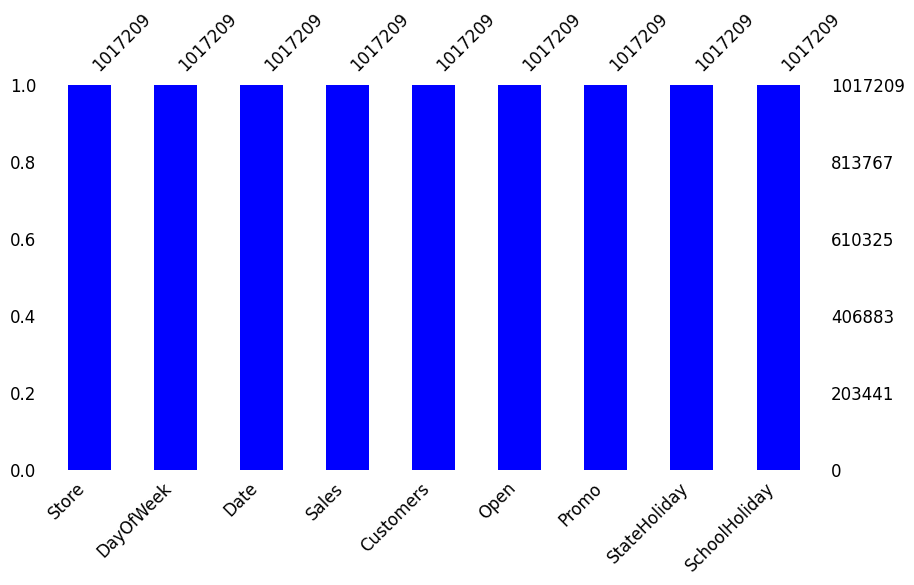

In [ ]:
missingno.bar(retail_sales_data, figsize = (10,5), fontsize = 12, color = 'blue')

<Axes: >

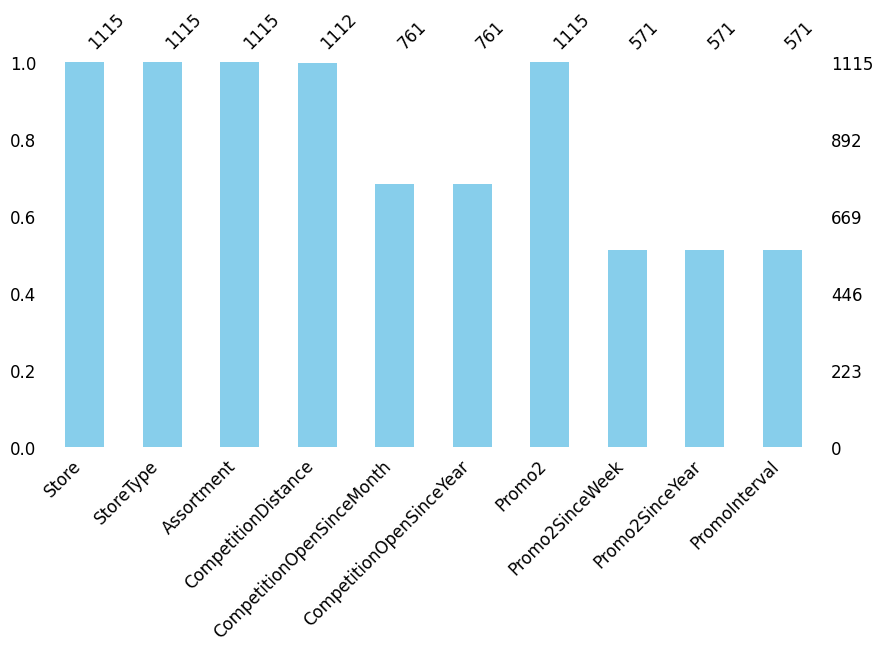

In [ ]:
# visualissation of missing values  for store dataset
missingno.bar(store_data, figsize = (10,5), fontsize = (12), color = 'skyblue')

### What did you know about your dataset?

*   We have total 1017209 rows and 9 columns in Rossmann Dataset
*   And 1115 rows and 10 columns in Store Dataset

*   We have none duplicate values in both the Dataset
*   We have none missing values in Rossmann Dataset but some are in Store Dataset which are CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
# rosmann column names
rcnl = retail_sales_data.columns.tolist()
print('Provided column names for Rossmann Dataset are:',rcnl)

Provided column names for Rossmann Dataset are: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [ ]:
# store column names
scnl = store_data.columns.tolist()
print('Provided column names for Store Dataset are:',scnl)

Provided column names for Store Dataset are: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
# Dataset Describe

In [ ]:
retail_sales_data.describe(include ='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# for store dataset
store_data.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description

Rossmann Stores Data.csv - historical data including Sales

Store.csv - supplemental information about the stores

Data fields - Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday.

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# for retail sales  data
for col in list(retail_sales_data.columns):
  print(col, ',its unique values')
  print(retail_sales_data[col].unique())
  print('length is',len(retail_sales_data[col].unique()))


Store ,its unique values
[   1    2    3 ... 1113 1114 1115]
length is 1115
DayOfWeek ,its unique values
[5 4 3 2 1 7 6]
length is 7
Date ,its unique values
['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29

In [ ]:
# for store dataset
for col in list(store_data.columns):
  print(col, ',its unique values')
  print(store_data[col].unique())
  print('length is',len(store_data[col].unique()))


Store ,its unique values
[   1    2    3 ... 1113 1114 1115]
length is 1115
StoreType ,its unique values
['c' 'a' 'd' 'b']
length is 4
Assortment ,its unique values
['a' 'c' 'b']
length is 3
CompetitionDistance ,its unique values
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

<Figure size 1000x500 with 0 Axes>

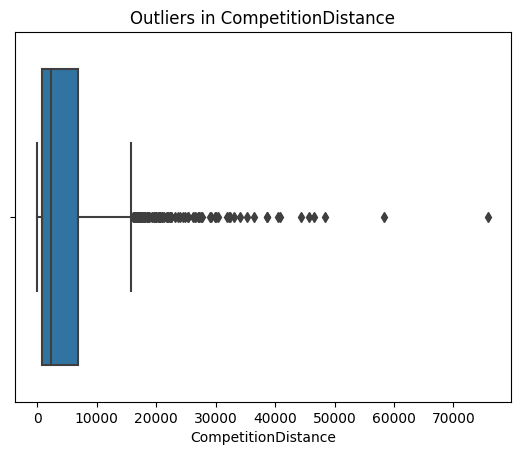

<Figure size 1000x500 with 0 Axes>

In [ ]:
# checking for outliers in 'CompetitionDistance'
# plotting seaborn box plot
sns.boxplot(x= store_data['CompetitionDistance']).set(title = 'Outliers in CompetitionDistance')
plt.figure(figsize = (10,5))

In [ ]:
# handling null values
# for CompetitionDistance
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)

In [ ]:
# now info of store dataset
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# checking whether the competitiondistance is filled or not
store_data[store_data['CompetitionDistance'].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

<Figure size 1000x500 with 0 Axes>

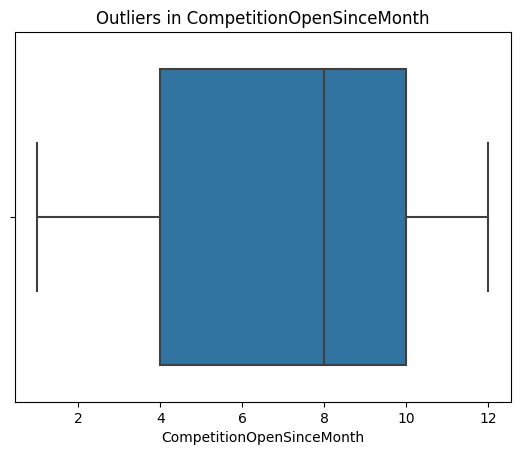

<Figure size 1000x500 with 0 Axes>

In [ ]:
# checking outliers for CompetitionOpenSinceMonth
# plotting seaborn box plot
sns.boxplot(x= store_data['CompetitionOpenSinceMonth']).set(title = 'Outliers in CompetitionOpenSinceMonth')
plt.figure(figsize = (10,5))

In [ ]:
# handling null values for CompetitionOpenSinceMonth
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].median(), inplace=True)

In [ ]:
# now store dataset becomes
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# checking whether the null values get filled or not
store_data[store_data['CompetitionOpenSinceMonth'].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

<Figure size 1000x500 with 0 Axes>

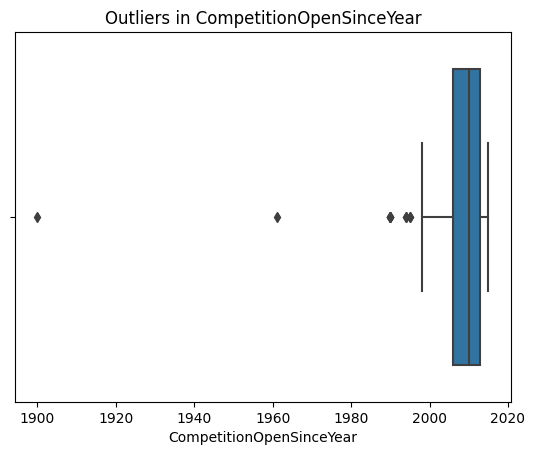

<Figure size 1000x500 with 0 Axes>

In [ ]:
# checking outliers for CompetitionOpenSinceYear
sns.boxplot(x= store_data['CompetitionOpenSinceYear']).set(title = 'Outliers in CompetitionOpenSinceYear')
plt.figure(figsize = (10,5))

In [ ]:
# handling null values in CompetitionOpenSinceYear
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].median(), inplace=True)

In [ ]:
# now store dataset info
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# handling null values in Promo2SinceWeek nd rest other two column
store_data['Promo2SinceWeek'].fillna(0, inplace = True)
store_data['Promo2SinceYear'].fillna(0, inplace = True)
store_data['PromoInterval'].fillna(0, inplace = True)

In [ ]:
# now info of store dataset becomes
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# merging of Roassmann Dataset and  Store Dataset
# checking shape of dataset using left join
df_left= pd.merge(retail_sales_data, store_data, on="Store", how= "left")
print(df_left.shape)
print(f"Total number of null values obtained from left join: {df_left.isna().sum().sum()}")

# checking shape of dataset using right join
df_right= pd.merge(retail_sales_data, store_data, on="Store", how= "right")
print(df_right.shape)
print(f"Total number of null values obtained from right join: {df_right.isna().sum().sum()}")


# checking shape of dataset using inner join
df_inner= pd.merge(retail_sales_data, store_data, on="Store", how= "inner")
print(df_inner.shape)
print(f"Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}")

# checking shape of dataset using outer join
df_outer= pd.merge(retail_sales_data, store_data, on="Store", how= "outer")
print(df_outer.shape)
print(f"Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}")

(1017209, 18)
Total number of null values obtained from left join: 0
(1017209, 18)
Total number of null values obtained from right join: 0
(1017209, 18)
Total number of null values obtained from inner join: 0
(1017209, 18)
Total number of null values obtained from outer join: 0


In [ ]:
data_set = pd.merge(retail_sales_data, store_data, on = 'Store', how = 'inner')
print(data_set.shape)

(1017209, 18)


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# required change in Dtype
data_set['Date'] = pd.to_datetime(data_set['Date'], format = '%Y/%m/%d')
data_set['CompetitionDistance'] = data_set['CompetitionDistance'].astype(int)
data_set['CompetitionOpenSinceMonth'] = data_set['CompetitionOpenSinceMonth'].astype(int)
data_set['CompetitionOpenSinceYear'] = data_set['CompetitionOpenSinceYear'].astype(int)
data_set['Promo2SinceWeek'] = data_set['Promo2SinceWeek'].astype(int)
data_set['Promo2SinceYear'] = data_set['Promo2SinceYear'].astype(int)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Considering those rows where stores are open and sales are not zero.
data_set= data_set[(data_set['Open']==1) & (data_set['Sales']!=0)]

# Now since every store in our dataset are opened , we don't need 'Open' column and we will drop this column
data_set.drop(['Open'],axis=1,inplace=True)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  int64         
 11  CompetitionOpenSinceMonth  844338 non-null  int64  

In [ ]:
# visualization in Univariate analysis

#### Chart - 1

#### Chart - 1

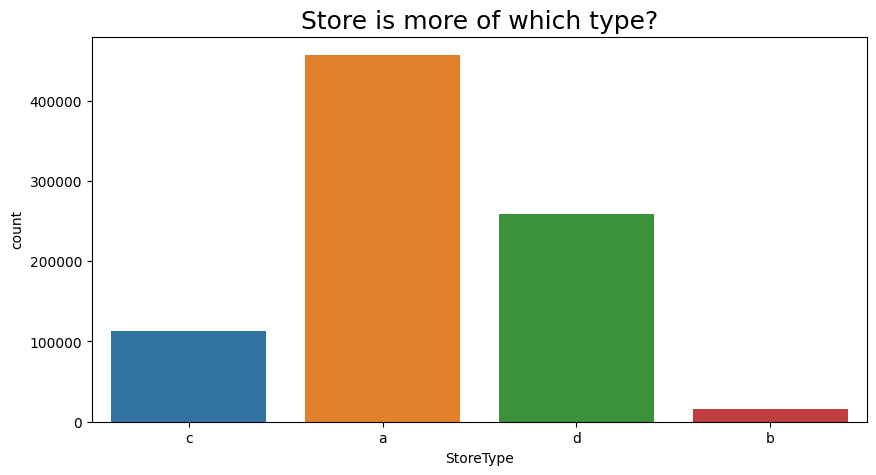

In [ ]:
# Chart - 1 visualization

# store is more of which type
plt.figure(figsize = (10,5))
sns.countplot(x = 'StoreType', data = data_set).set_title('Store is more of which type?', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted this graph to know which store type is more in our dataset

##### 2. What is/are the insight(s) found from the chart?

As we can see that store  of type 'a' is maximum and store type 'b' is least.
It may indicates that store type 'a' is more successful whereas 'b' is  least.
Store type 'd' is average and store type 'c' is not least but below than average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that there is variations in store types which will ultimately affect their respective sales. Since store type 'a' is highest so its sales also might be highest and  in the same way store type 'b' is least so its sales also might be  least.

## chart -2

<ipython-input-52-811f5d67d744>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_set['Customers'], color = 'royalblue', shade = True)
<ipython-input-52-811f5d67d744>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_set['Sales'], color = 'royalblue', shade = True)


<function matplotlib.pyplot.show(close=None, block=None)>

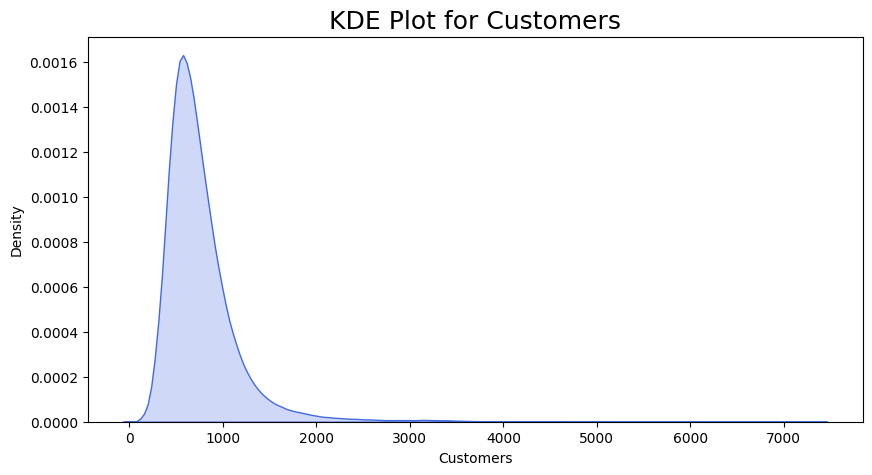

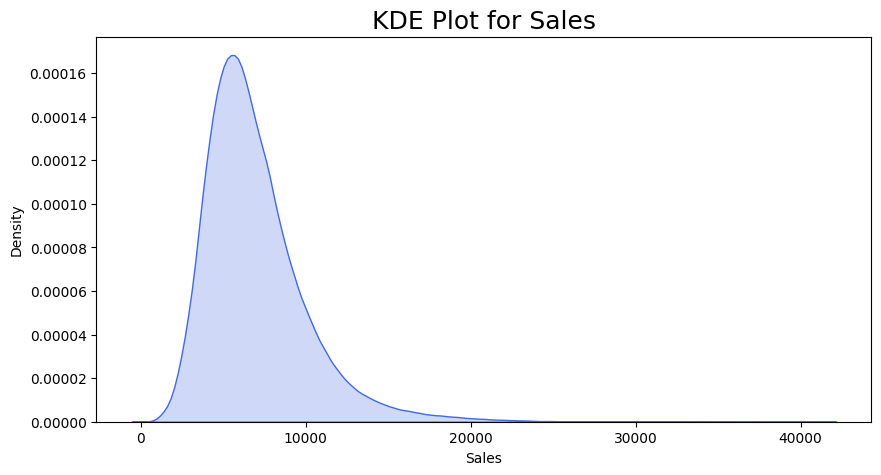

In [ ]:
# Chart - 2 visualization code

# average number of customers
# density distribution of customer
plt.figure(figsize= (10,5))
# plt.subplot(2,2,3)
sns.kdeplot(data_set['Customers'], color = 'royalblue', shade = True)
# plt.figure(figsize= (10,5))
# plt.subplot(2,2,3)
plt.title('KDE Plot for Customers', fontsize = 18)
# density distribution for sales
plt.figure(figsize = (10,5))
sns.kdeplot(data_set['Sales'], color = 'royalblue', shade = True)
plt.title('KDE Plot for Sales', fontsize = 18)
plt.show

##### 1. Why did you pick the specific chart?

Here we have plotted this graph to know tthe density distribution of customer and sales to know whether  the  observations  are high or low and also whether they are concentrated at one place or  spread out across the entire scale for continuous features only.

##### 2. What is/are the insight(s) found from the chart?

We observed that average number of customer visiting stores is  approx 700
And average value of  sales is around 5000 and also the graph  is rightly skewed which means most of  the stores are open where the middle  class  resides

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the graph we get to know that customers are around only 700 and sales are preety enough but still we need to make strategy to increase the number of customers for more  and more  sales for impactful business

#### Chart - 3

Text(0.5, 1.0, 'Pie chart for Assortment Level')

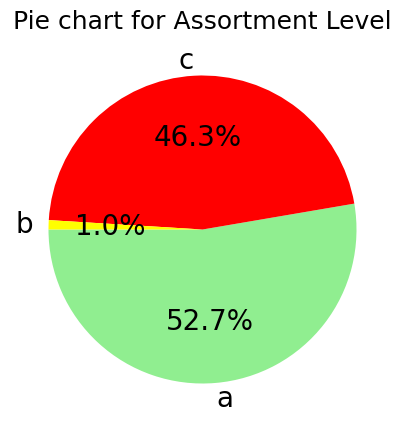

In [ ]:
# Chart - 3 visualization code
# assortment level
plt.figure(figsize = (10,5))
labels = 'a', 'c', 'b'
sizes = data_set.Assortment.value_counts()
colors = ['lightgreen', 'red', 'yellow']
plt.pie(sizes, labels = labels, colors =  colors, autopct = '%1.1f%%', startangle = 180, textprops = {'fontsize':20})
plt.title('Pie chart for Assortment Level', fontsize = 18)
# plt.show()

##### 1. Why did you pick the specific chart?

we have plotted this graph to know the percentage of different levels of  assortment.

##### 2. What is/are the insight(s) found from the chart?

Most of the stores have assortment_a then assortment_c and least of them is assortment_b.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Store type  'a' and store type 'c' are showing positive growth which leads to more sales while store type 'b'' is showing less growth which leads to less sales that's might be  the reason to adopt 'a' and 'c' type assortment strategy.

#### Chart - 4

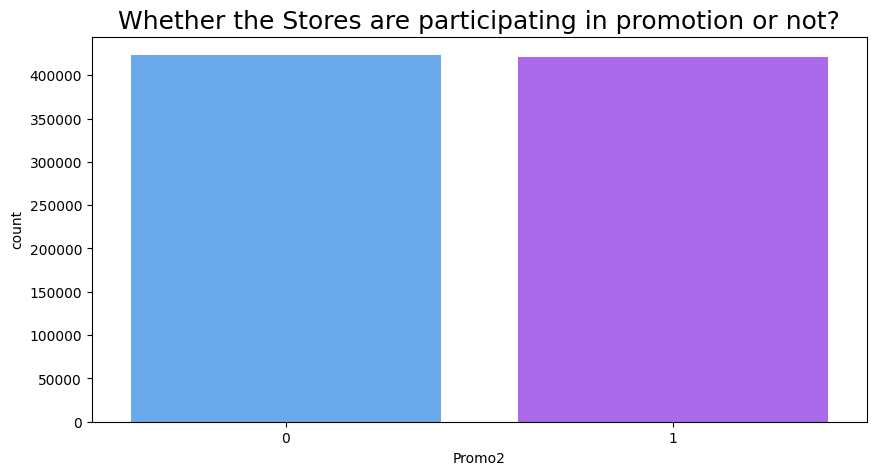

In [ ]:
# Chart - 4 visualization code
# are store promoting or not promoting?
plt.figure(figsize = (10,5))
sns.countplot(x = 'Promo2', palette = 'cool', data = data_set)
plt.title('Whether the Stores are participating in promotion or not?', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

We plotted  this  graph for a clear vision to know the status of stores that  whether the stores are getting promoted or not.

##### 2. What is/are the insight(s) found from the chart?

From the  graph it is clear that stores getting promoted and  not getting promoted are almost equal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can think to increase the stores  getting promoted as it ultimately increases the  sales . As getting promoted and not getting promoted are somehow equal which is somewhere affecting the sales. So we need to promote the stores more to get more sales.

**Bivariate** **Analysis**

#### Chart - 5

<ipython-input-55-c2a8fc726ce7>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'Customers', y ='Sales', palette = 'cool', data = data_set)


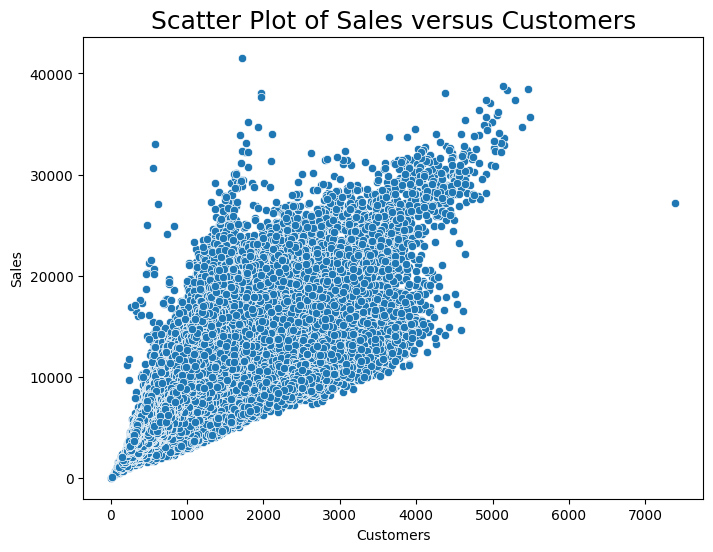

In [ ]:
# Chart - 5 visualization code
# sales versus customer
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Customers', y ='Sales', palette = 'cool', data = data_set)
plt.title('Scatter Plot of Sales versus Customers', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

Here we have picked a scatter plot to know  the relationship between number of  customers visitig stores and  total sales.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is  easy  to observe that the correlation between customers and sales is preety good as customers are increasing  sales are also healing upside.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to our graph customers  and sales are highly correlated with each other which from the business point of view it is too good.

#### Chart - 6

<function matplotlib.pyplot.show(close=None, block=None)>

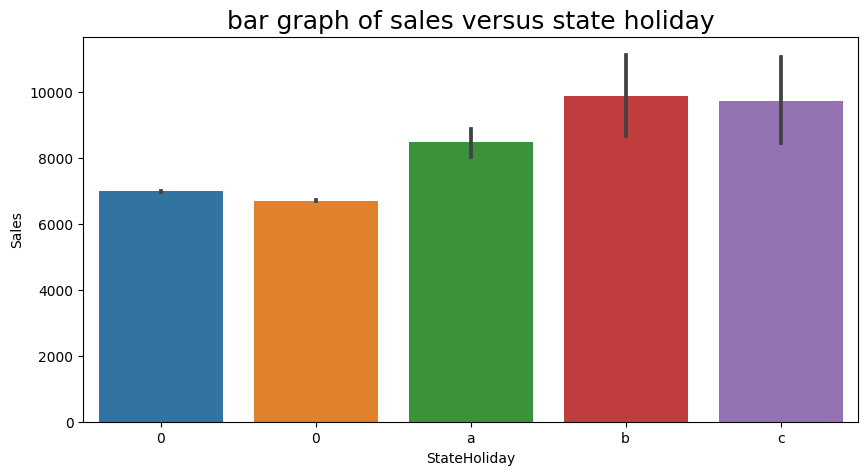

In [ ]:
# Chart - 6 visualization code
# Sales Verses State Holiday
plt.figure(figsize = (10,5))
sns.barplot(x = 'StateHoliday', y ='Sales', data= data_set)
plt.title('bar graph of sales versus state holiday', fontsize = 18)
plt.show

##### 1. Why did you pick the specific chart?

We plotted the above graph to know the effect of various state holiday  on sales

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can conclude that during the StateHoliday 'b' sales are highest and followed by StateHoliday 'c' followed by StateHoliday 'a'. And also we are observing that sales are comparitively low during normal days than the holidays time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can take benefit of StateHolidays for more and more sales by attracting the customers with various scheme like discount, buy one get one and many more beneficial  scheme. We should implement some good scheme during normal days also  to keep balance in the number of sales.

#### Chart - 7

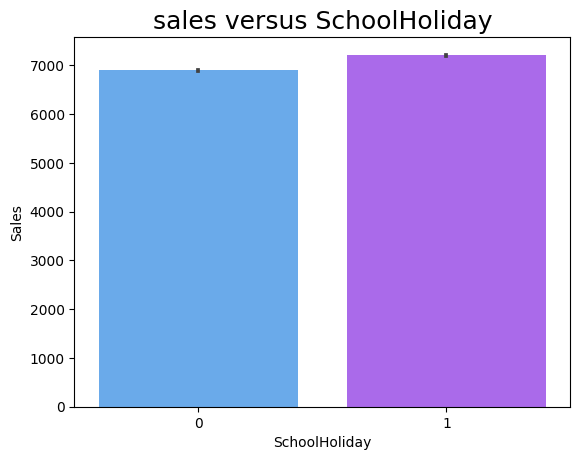

In [ ]:
# Chart - 7 visualization code
# Sales vs School Holiday
sns.barplot(x = 'SchoolHoliday', y = 'Sales', palette = 'cool', data = data_set, )
plt.title('sales versus SchoolHoliday', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

We picked this particular chart for clear observation of number of sales during SchoolHoliday and Non-SchoolHoliday.

##### 2. What is/are the insight(s) found from the chart?

We can  see in the above graph that sales are little high  during SchoolHoliday as compared to during Non-SchoolHoliday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As sales are not getting much impacted with SchoolHoliday but since sales are little high during SchoolHoliday. So we can try to make more profit by applying some offers.

#### Chart - 8

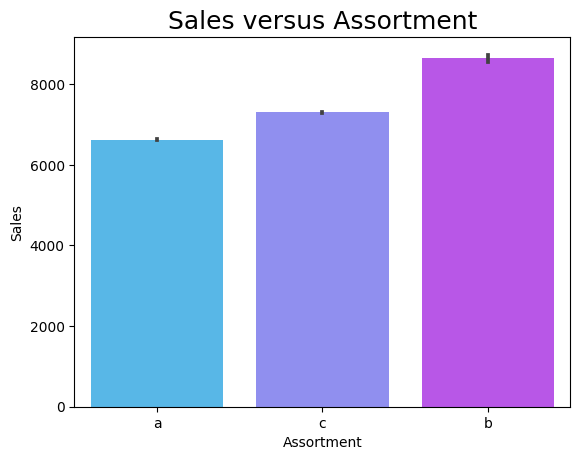

In [ ]:
# chart-8 visualization

# sales vs assortment
sns.barplot(x = 'Assortment', y = 'Sales', palette = 'cool', data = data_set)
plt.title('Sales versus Assortment', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

We picked this chart to observe sales for various assortment.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clear that assortment_b has highest sales, assortment_a has lowest sales and assortment_c has average sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As sales is highest for assortment_b so we could invest our efforts more on this rather than assortment_a and assortment_c to increase the sales.

#### Chart - 9

<function matplotlib.pyplot.show(close=None, block=None)>

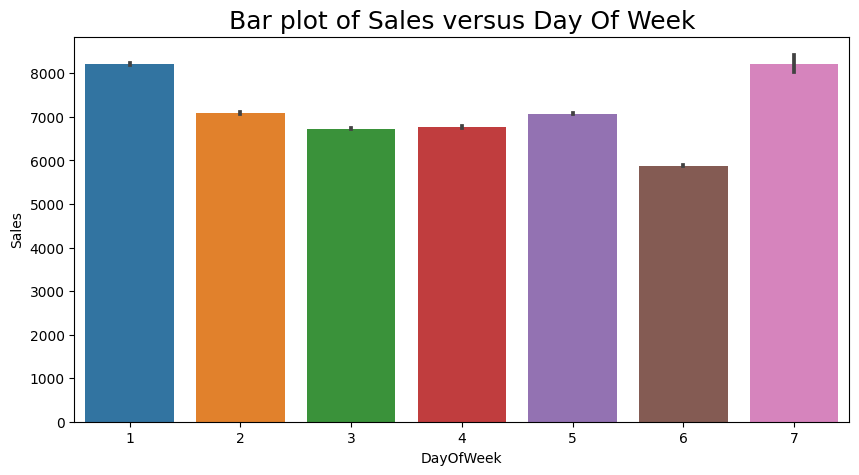

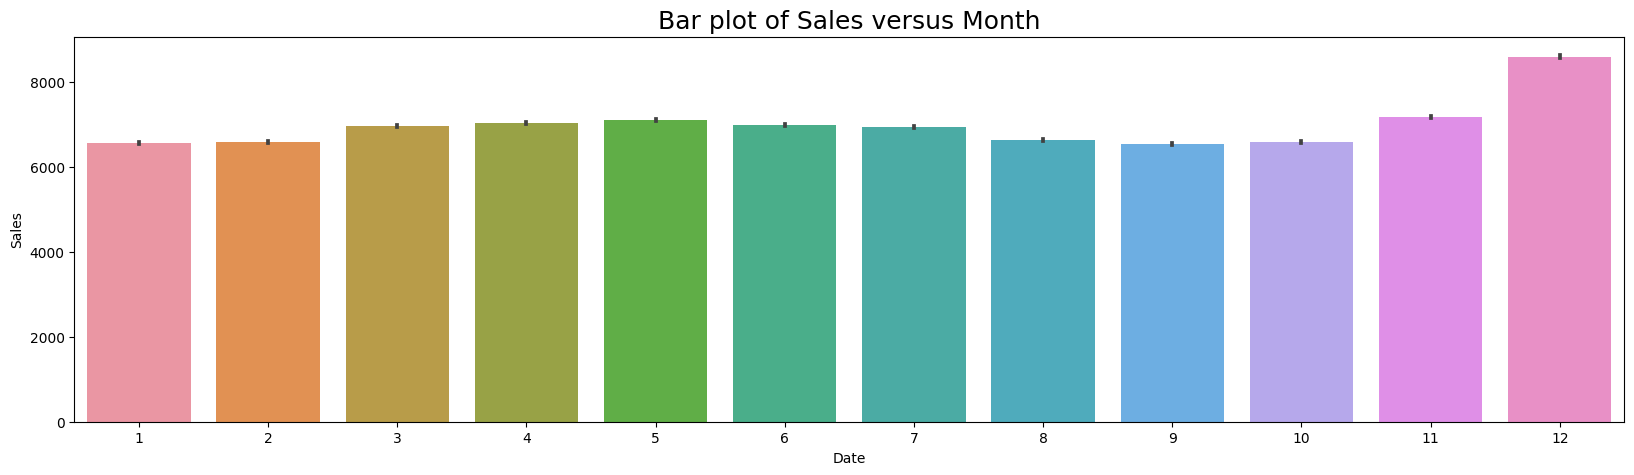

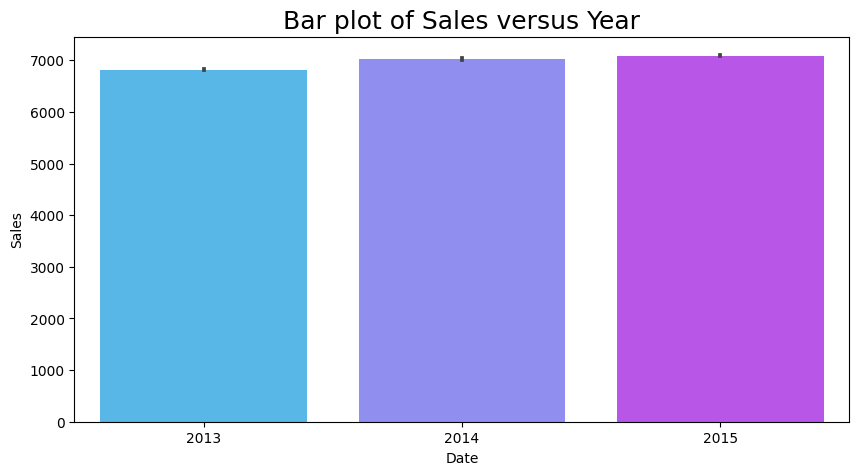

In [ ]:
# chaart-9 visualization

# sales vs Day Of Week/ Month/ Year
plt.figure(figsize = (10,5))
sns.barplot(x = 'DayOfWeek', y = 'Sales', data = data_set).set_title('Bar plot of Sales versus Day Of Week', fontsize = 18)
plt.show
# sales vs month
plt.figure(figsize = (20,5))
sns.barplot(x = data_set['Date'].dt.month, y = data_set['Sales']).set_title('Bar plot of Sales versus Month', fontsize = 18)
plt.show
# sales vs year
plt.figure(figsize = (10,5))
sns.barplot(x = data_set['Date'].dt.year, y = data_set['Sales'], palette = 'cool').set_title('Bar plot of Sales versus Year', fontsize = 18)
plt.show

##### 1. Why did you pick the specific chart?

We picked this chart to observe the  variation of sales over the week, over the month andd over the year.

##### 2. What is/are the insight(s) found from the chart?

1. sales are highest on 7th and 1st day of week respectively and least on 6th day of  week.
2. Sales  are highest during last two month of  the  year i.e., November and December and least sales are during the month of September.
3. Sales are increasing every year but with a very  low speed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. On day 1 and  day 7 sales are pretty good. So we should put some extra care to run the stores smoothly on these days and  also try to impress customers on the rest days of  the week to keep balance in the sales.
2. Reason of  high sales in Nov. and Dec. might be due to festive  month. We should  take care of smoothness of high sales during these months. And also try to launch some exciting strategy to attract customers during rest of the month for enough sales.
3. Sales are not increasing with a satisfactory speed. So we should try to know the reaon behind that then according to that we should  make strategy to increase the rate of sales.

#### Chart - 10

<function matplotlib.pyplot.show(close=None, block=None)>

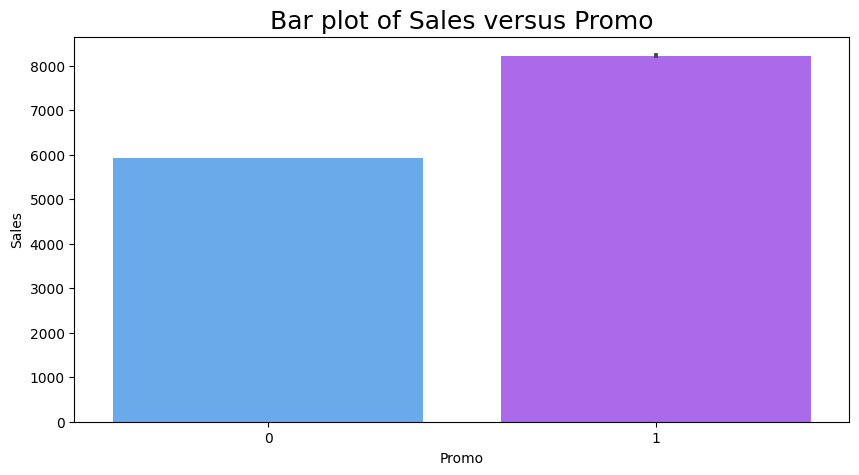

In [ ]:
# chart-10 visualization

# sales vs promo
plt.figure(figsize = (10,5))
sns.barplot(x = 'Promo', y = 'Sales', data = data_set, palette = 'cool').set_title('Bar plot of Sales versus Promo', fontsize = 18)
plt.show

##### 1. Why did you pick the specific chart?

We picked this chart to know  the status of sales for the stores which are  doing promotion and which are not doing promotion.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can conclude that sales are high for those  store which are doing promotion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Clearly, stores that are doing promotion they are advised to do promotion for the increment of the sales to be more competitive with  others in the business world.

#### Chart - 11

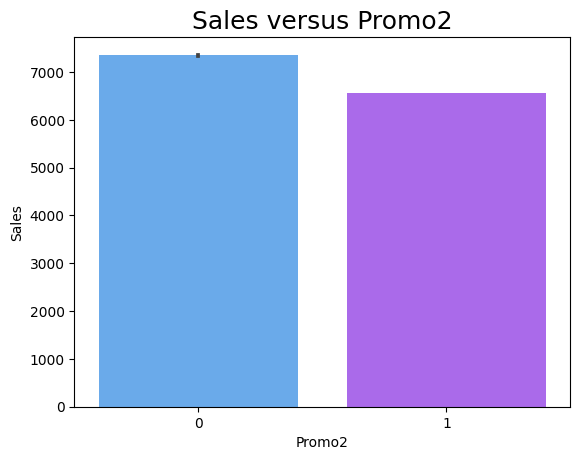

In [ ]:
# chart-11 visualization

# Graph of Sales verses Promo2
sns.barplot(x ='Promo2', y ='Sales', palette = 'cool', data = data_set)
plt.title('Sales versus Promo2', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

To know the staus of sales with presence and absence of Prommo2.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that sales are not that much satisfactory for the stores which are running consecutive promotions i.e., customers are not paying attention to these stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that stores running cosecutive promotion are not much fruitful. So stores need to change their strategy to attract buyers.

Chart- 12

Text(0.5, 1.0, 'Graph of Sales vs CompetitionOpenSincYear')

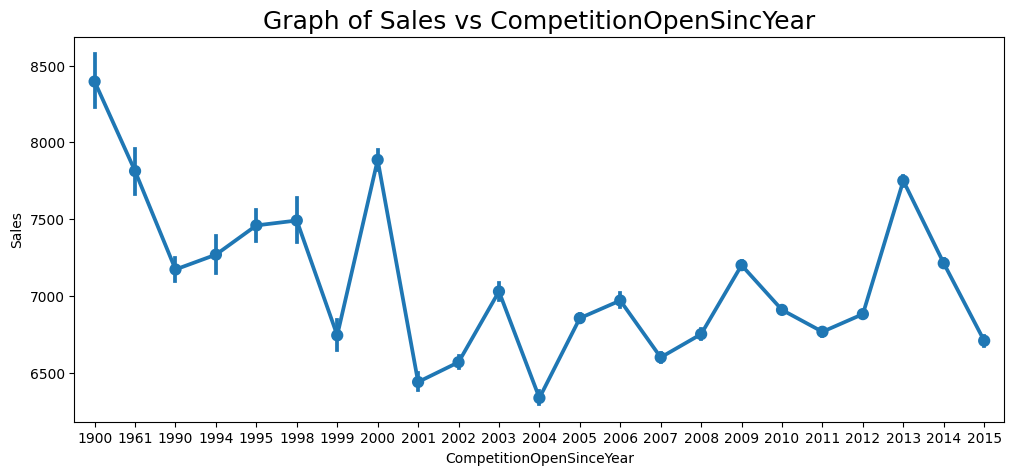

In [ ]:
# chart-12 visualization
# sales versus CompetitionOpenSinceYear
plt.figure(figsize =(12,5))
sns.pointplot(x = 'CompetitionOpenSinceYear', y = 'Sales', data = data_set).set_title('Graph of Sales vs CompetitionOpenSincYear', fontsize = 18)

1. Why did you pick the specific chart?

We picked this  chart to know about the sales every year as there is  competitor near the store.

2. What is/are the insight(s) found from the chart?

From the graph it is clear that from year 1900 to 2000 sales was in good state but from 2000 there is downfall in sales. It might be due to less  competitor during 1900 but gradually competitor increases and sales got affected.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



From the above graph we can observe that there is sudden increase and decrease in sales throughout the years. stores should grip some good and more effective  strategy to increase the sales as more competitors are making more difficulties for the stores.

Multivariate Analysis

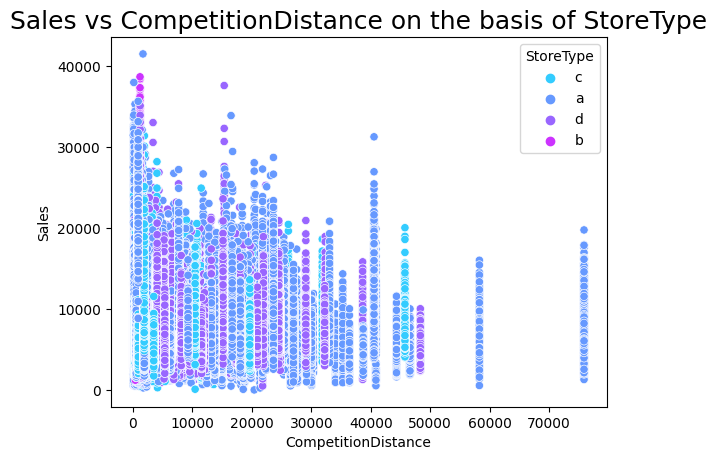

In [ ]:
# chart-13 visualization
# sales versus CompetitionDistance
sns.scatterplot(y ='Sales', x = 'CompetitionDistance', hue = 'StoreType', palette = 'cool', data = data_set)
plt.title('Sales vs CompetitionDistance on the basis of StoreType', fontsize = 18)
plt.show()

1. Why did you pick the specific chart?

We picked this chart to keep knowledge of CompetetionDistance and Sales.

2. What is/are the insight(s) found from the chart?

From the above graph we can see that stores are not much  far from each other(Store type 'a' is creating little exceptional  case). And the stores that are densely close to each other are having more sales

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Sales are pretty good for densely located stores. So with the same strategy they can continue running their stores in the same way.

#### Chart - 14 - Correlation Heatmap

<ipython-input-64-9c15e5e0218e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set.corr(), annot = True, cmap = 'cool', square = True).set_title('Correlation Heatmap of Play Store  Data and User Review Data', fontsize = 18)


<function matplotlib.pyplot.show(close=None, block=None)>

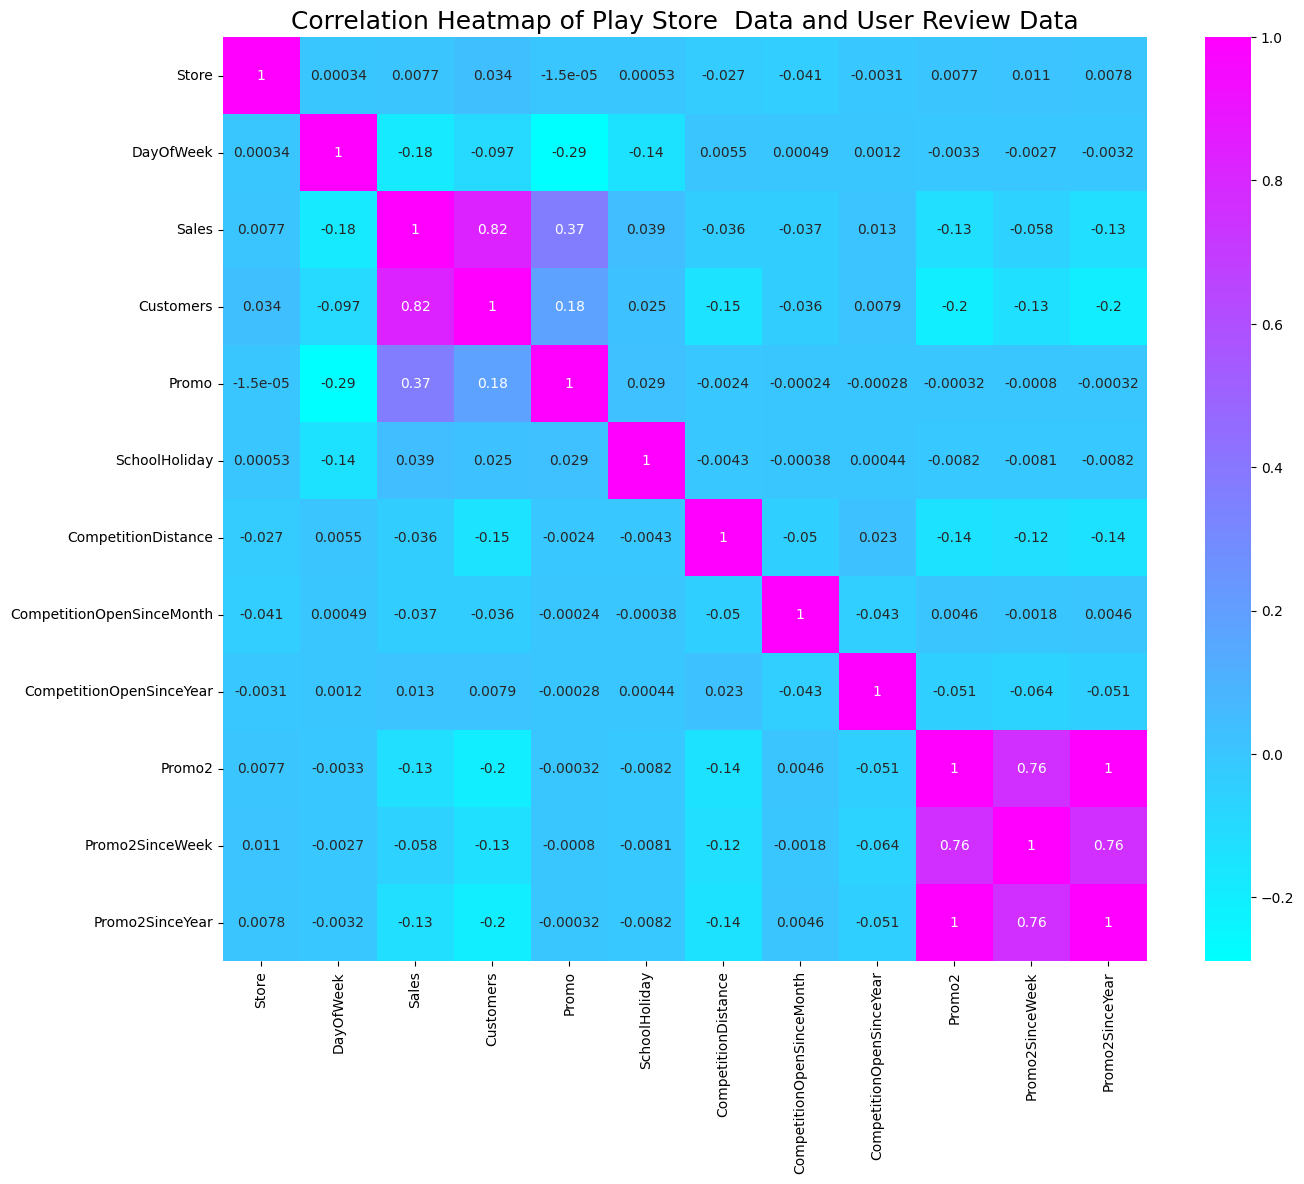

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (15,12))
sns.heatmap(data_set.corr(), annot = True, cmap = 'cool', square = True).set_title('Correlation Heatmap of Play Store  Data and User Review Data', fontsize = 18)
plt.show

#### Chart - 15 - Pair Plot

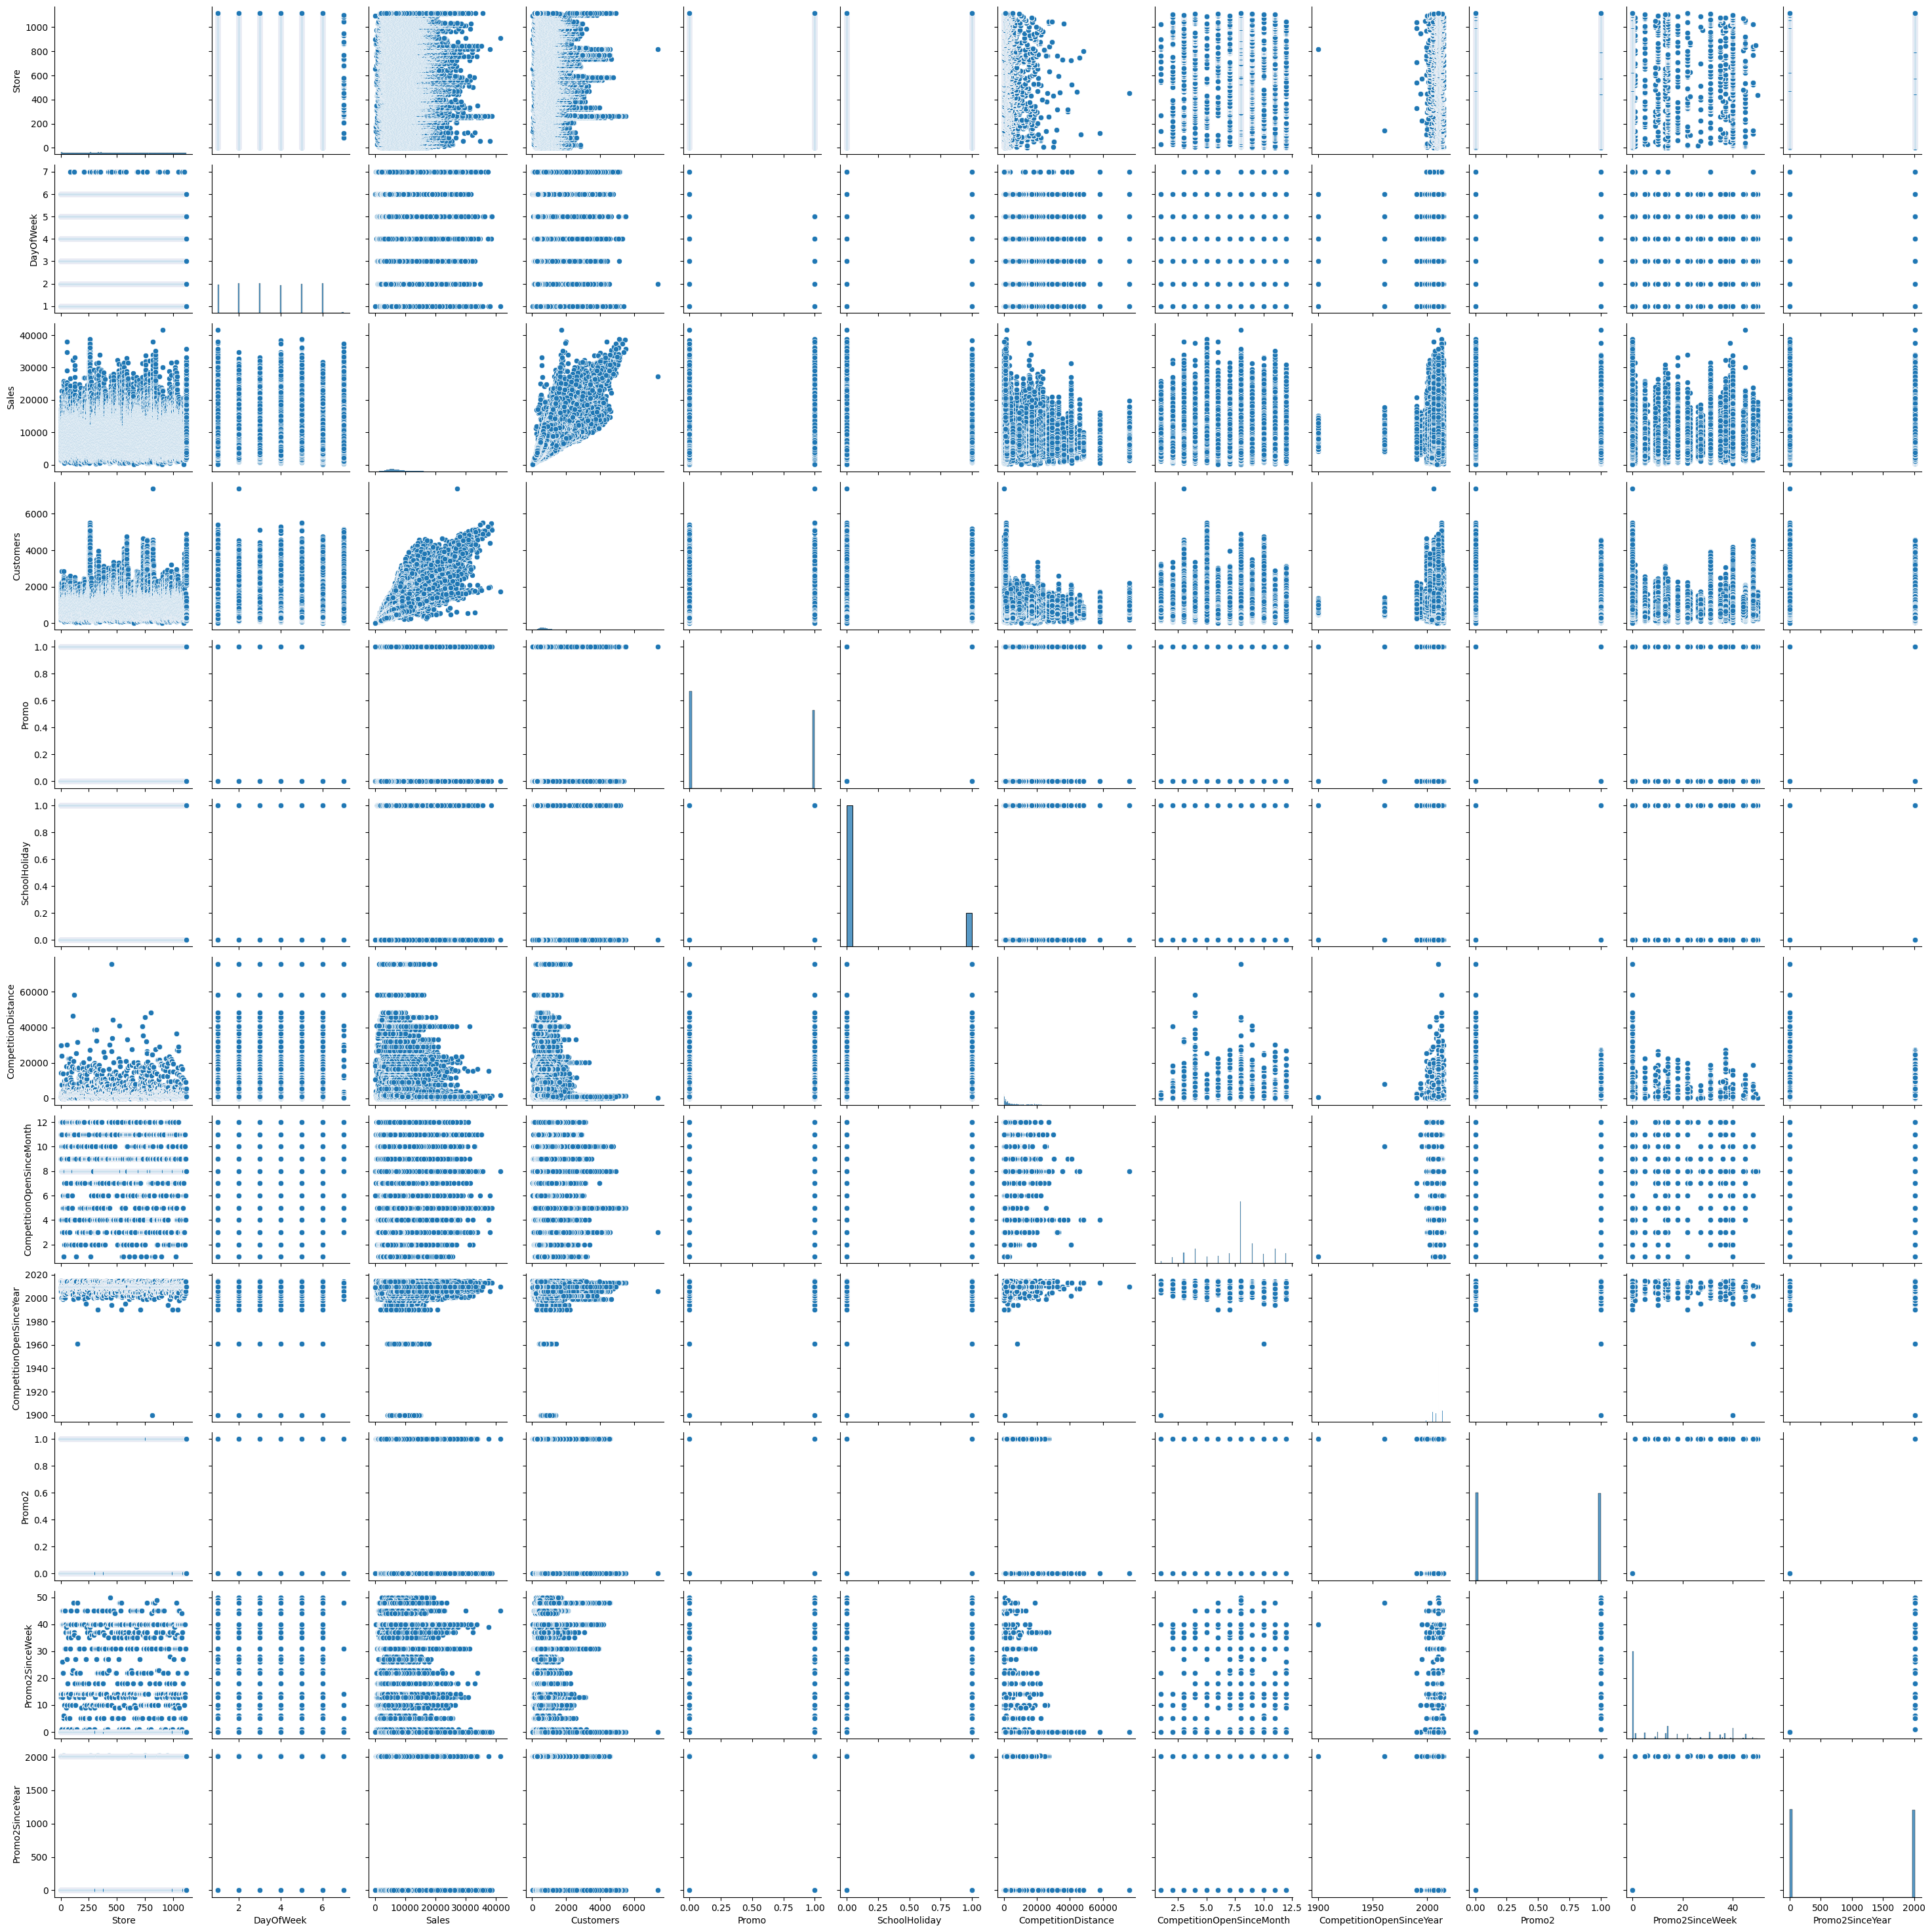

In [ ]:
# Pair Plot visualization code
sns.pairplot(data_set)
plt.show()

##### 1. Why did you pick the specific chart?

We picked this  specific chart to plot for multiple visuals and various insights related to the data in a single frame.

##### 2. What is/are the insight(s) found from the chart?

Pairplot helps us to visualise the realtionship of every variable with the sales like variable customer is  establishing high correlation with the sales. and many more  visualization in a single look.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1>> Null Hypothesis- there is no realtion between Customers and Sales

    Alternate Hypothesis- there is relation between Customers and Sales

2>> Null Hypothesis- there is no realtion between Promo and Sales

    Alternate Hypothesis- there is relation between Promo and Sales

3>> Null Hypothesis- there is no realtion between DayOfWeek and Sales

    Alternate Hypothesis- there is relation between DayOfWeek and Sales

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis- there is no realtion between Customers and Sales

Alternate Hypothesis- there is relation between Customers and Sales


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# importation of required library
from scipy.stats import pearsonr
# now required code
sample1 = data_set['Customers'].head(60)
sample2 = data_set['Sales'].head(60)
stat, p = pearsonr(sample1, sample2)
print('stat=%.3f, p=%.2f'%(stat,p))
if p> 0.05:
  print('Null Hypothesis is acceptable')
else:
  print('Alternate Hypothesis is True')

stat=0.939, p=0.00
Alternate Hypothesis is True


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-value along with Pearson Correlation coefficient value. It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.939 which implies that theses two features are having strong positive correlation between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis- there is no realtion between Promo and Sales

Alternate Hypothesis- there is relation between Promo and Sales


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# importation of required library
from scipy.stats import pearsonr
# now required code
sample1 = data_set['Promo'].head(60)
sample2 = data_set['Sales'].head(60)
stat, p = pearsonr(sample1, sample2)
print('stat=%.3f, p=%.2f'%(stat,p))
if p> 0.05:
  print('Null Hypothesis is acceptable')
else:
  print('Alternate Hypothesis is True')

stat=0.708, p=0.00
Alternate Hypothesis is True


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-value along with Pearson Correlation coefficient value. It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Promo and Sales features we got Correlation coefficient as 0.708 which implies that theses two features are having good positive correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis- there is no realtion between DayOfWeek and Sales

Alternate Hypothesis- there is relation between DayOfWeek and Sales



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# importation of required library
from scipy.stats import pearsonr
# now required code
sample1 = data_set['DayOfWeek'].head(60)
sample2 = data_set['Sales'].head(60)
stat, p = pearsonr(sample1, sample2)
print('stat =%.3f, p=%.2f'%(stat,p))
if p> 0.05:
  print('Null Hypothesis is acceptable')
else:
  print('Alternate Hypothesis is True')

stat =-0.221, p=0.09
Null Hypothesis is acceptable


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-value along with Pearson Correlation coefficient value. It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as -0.221 which implies that these two features are having weak negative correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data_set.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

By plotting box plot we first checked the outliers and then replaced the null  values of various variables with the techniques--mean median, mode and 0 accordingly.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  int64         
 11  CompetitionOpenSinceMonth  844338 non-null  int64  

In [ ]:
# have a look at continuous value columns
continuous_value_column = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'DayOfWeek', 'Promo2SinceWeek', 'Promo2SinceYear']
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]


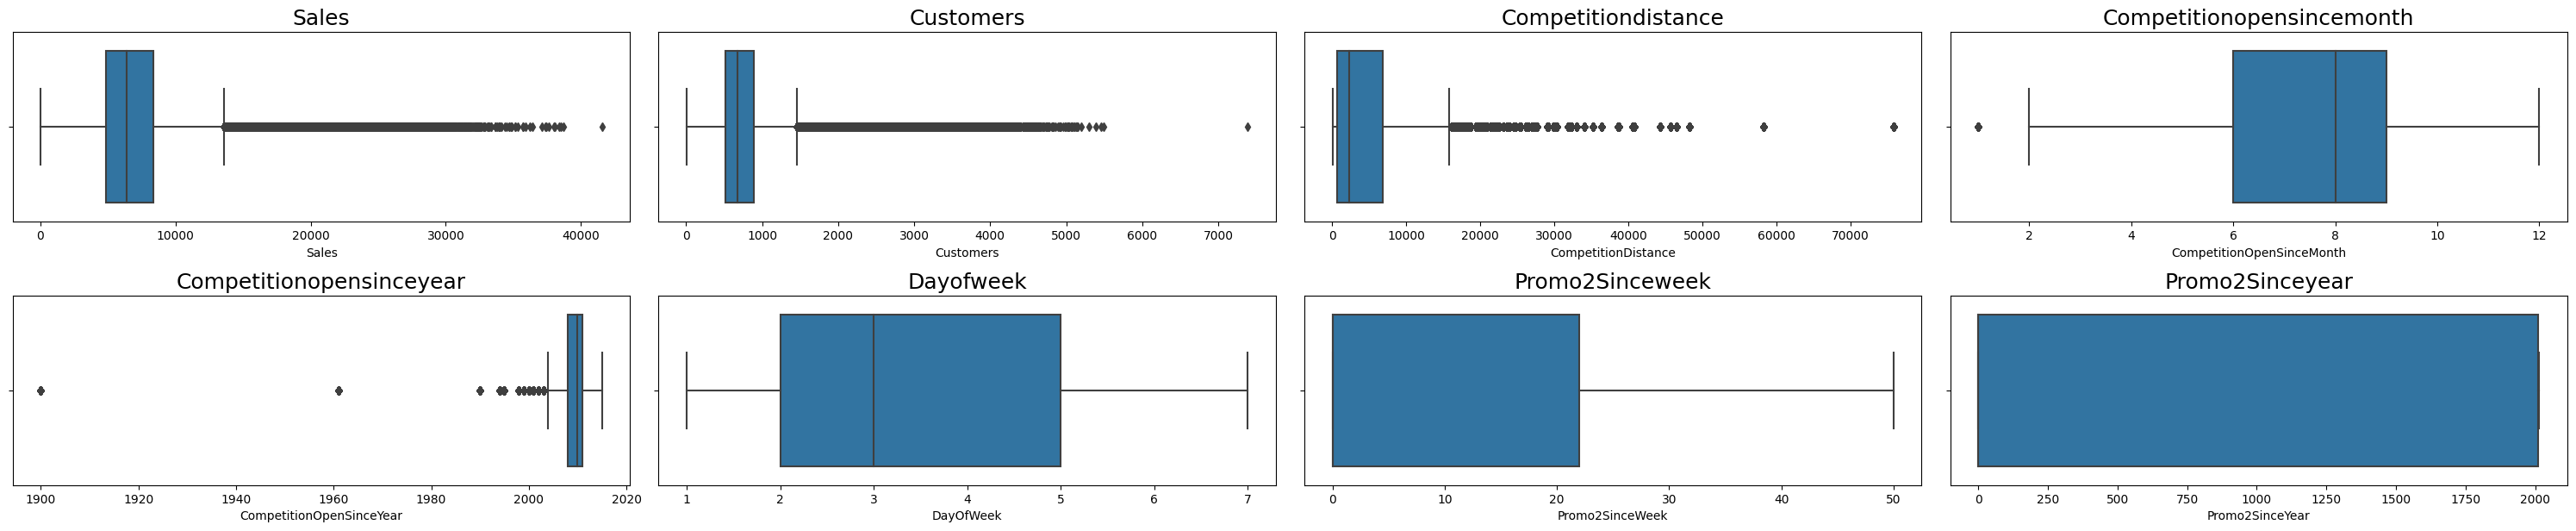

In [ ]:
# have a look at continuous value columns

plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_value_column):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = data_set).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()


In [ ]:
# IQR Technique to treat outliers
def iqr2_treat_outliers(data):
  # now calculating first and last quartile
  q1,q3 = np.percentile(data, [25,75])
  # now calculating interquartile range
  IQR = q3-q1
  # now the bounds
  Lower_bound = q1-(1.5*IQR)
  Upper_bound = q3+(1.5*IQR)
  # now the outliers
  Outliers = [x for x in data if x<Lower_bound or x>Upper_bound]
  # replacement with the nearest quartile
  data_treatment = [q1 if x<Lower_bound
                    else q3 if x>Upper_bound
                    else x for x in data]
  int_treateddata = [int (absolute) for absolute in data_treatment]

  return int_treateddata

In [ ]:
# passing all the columns listed in continuous_value_column
for column in continuous_value_column:
  data_set[column] = iqr2_treat_outliers(data_set[column])

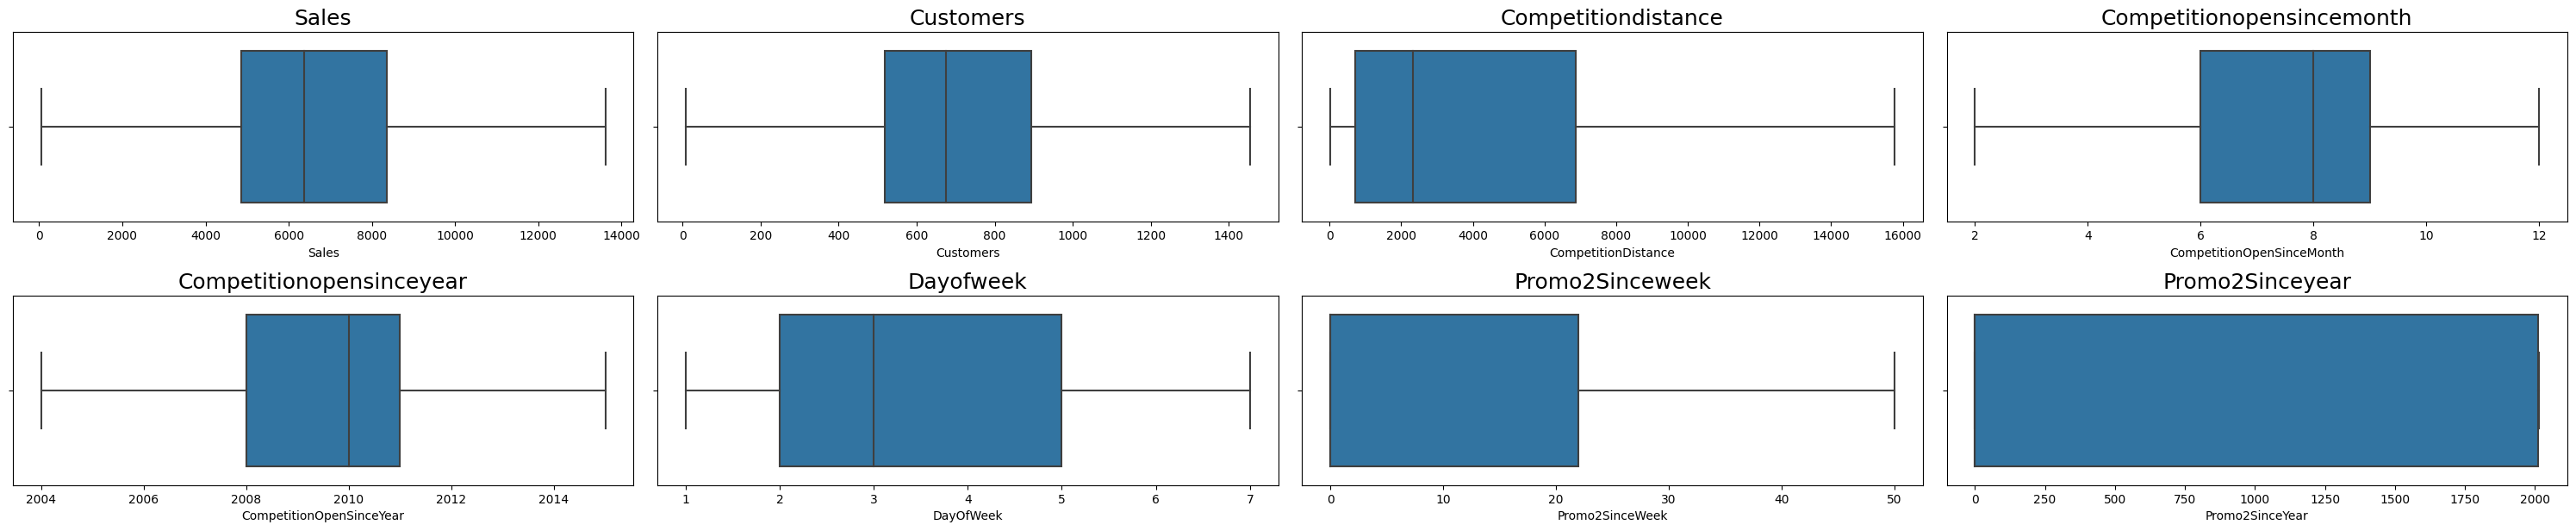

In [ ]:
# now rechecking outliers
# plotting box plot
plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_value_column):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = data_set).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# checking columns dtype as object
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  int64         
 11  CompetitionOpenSinceMonth  844338 non-null  int64  

In [ ]:
# creating a new variable for this
typeobj = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [ ]:
# uniqueness
for unique in typeobj:
  print(unique, ',its unique values')
  print(data_set[unique].unique())
  print('length is',  data_set[unique].nunique())


StateHoliday ,its unique values
['0' 0 'a' 'b' 'c']
length is 5
StoreType ,its unique values
['c' 'a' 'd' 'b']
length is 4
Assortment ,its unique values
['a' 'c' 'b']
length is 3
PromoInterval ,its unique values
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
length is 4


In [ ]:
data_set['StateHoliday'].replace({'0':0,'a':1,'b':1,'c':1}, inplace = True)

In [ ]:
# for convenience let's create a copy
new_dataset = data_set.copy()

In [ ]:
# Encode your categorical columns by dropping the first category
new_dataset= pd.get_dummies(data_set, dtype=int, drop_first=True)

In [ ]:
new_dataset.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,0,1,1270,9,...,0,0,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,0,1,1270,9,...,0,0,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,0,1,1270,9,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844338 non-null  int64         
 1   DayOfWeek                       844338 non-null  int64         
 2   Date                            844338 non-null  datetime64[ns]
 3   Sales                           844338 non-null  int64         
 4   Customers                       844338 non-null  int64         
 5   Promo                           844338 non-null  int64         
 6   StateHoliday                    844338 non-null  int64         
 7   SchoolHoliday                   844338 non-null  int64         
 8   CompetitionDistance             844338 non-null  int64         
 9   CompetitionOpenSinceMonth       844338 non-null  int64         
 10  CompetitionOpenSinceYear        844338 non-null  int64 

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used one-hot encoding technique to change categorical features of object type into int type by creating their dummies to make them compatible in various ML algorithm.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# not needed

#### 2. Lower Casing

In [ ]:
# Lower Casing
# not needed

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# not needed

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# not needed

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# not needed

In [ ]:
# Remove White spaces
# not needed

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# not needed

#### 7. Tokenization

In [ ]:
# Tokenization
# not needed

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# not needed

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# not needed

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# not needed

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
new_dataset['year'] = new_dataset['Date'].dt.year
new_dataset['Week'] = new_dataset['Date'].dt.week
new_dataset['Month'] = new_dataset['Date'].dt.month
new_dataset['Day'] = new_dataset['Date'].dt.day

<ipython-input-95-18b159da283a>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  new_dataset['Week'] = new_dataset['Date'].dt.week


In [ ]:
new_dataset.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",year,Week,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,1270,9,...,0,0,0,0,0,0,2015,31,7,31
1,1,4,2015-07-30,5020,546,1,0,1,1270,9,...,0,0,0,0,0,0,2015,31,7,30
2,1,3,2015-07-29,4782,523,1,0,1,1270,9,...,0,0,0,0,0,0,2015,31,7,29


In [ ]:
# combining some columns
# combining promo2sinceweek and promo2sinceyear
new_dataset['ComboPromo2'] = (new_dataset['year']-new_dataset['Promo2SinceYear'])*12 + (new_dataset['Week']-new_dataset['Promo2SinceWeek'])*0.230137
# correction of neg values
new_dataset['ComboPromo2'] = new_dataset['ComboPromo2'].map(lambda x:int(0) if x<0 else int(x))

# combinig competitionopensincyear and competitionopensincemonth
new_dataset['ComboCompetition'] = (new_dataset['year']-new_dataset['CompetitionOpenSinceYear'])*12 +(new_dataset['Month'] - new_dataset['CompetitionOpenSinceMonth'])
# correction of neg values
new_dataset['ComboCompetition'] = new_dataset['ComboCompetition'].map(lambda x:0 if x<0 else x)

In [ ]:
new_dataset.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",year,Week,Month,Day,ComboPromo2,ComboCompetition
0,1,5,2015-07-31,5263,555,1,0,1,1270,9,...,0,0,0,0,2015,31,7,31,24187,82
1,1,4,2015-07-30,5020,546,1,0,1,1270,9,...,0,0,0,0,2015,31,7,30,24187,82
2,1,3,2015-07-29,4782,523,1,0,1,1270,9,...,0,0,0,0,2015,31,7,29,24187,82


#### 2. Feature Selection

<ipython-input-99-9051f09b31c6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(new_dataset.corr()), annot = True, cmap = 'cool').set_title('Correlation Heatmap to analyze the features', fontsize = 18)


<function matplotlib.pyplot.show(close=None, block=None)>

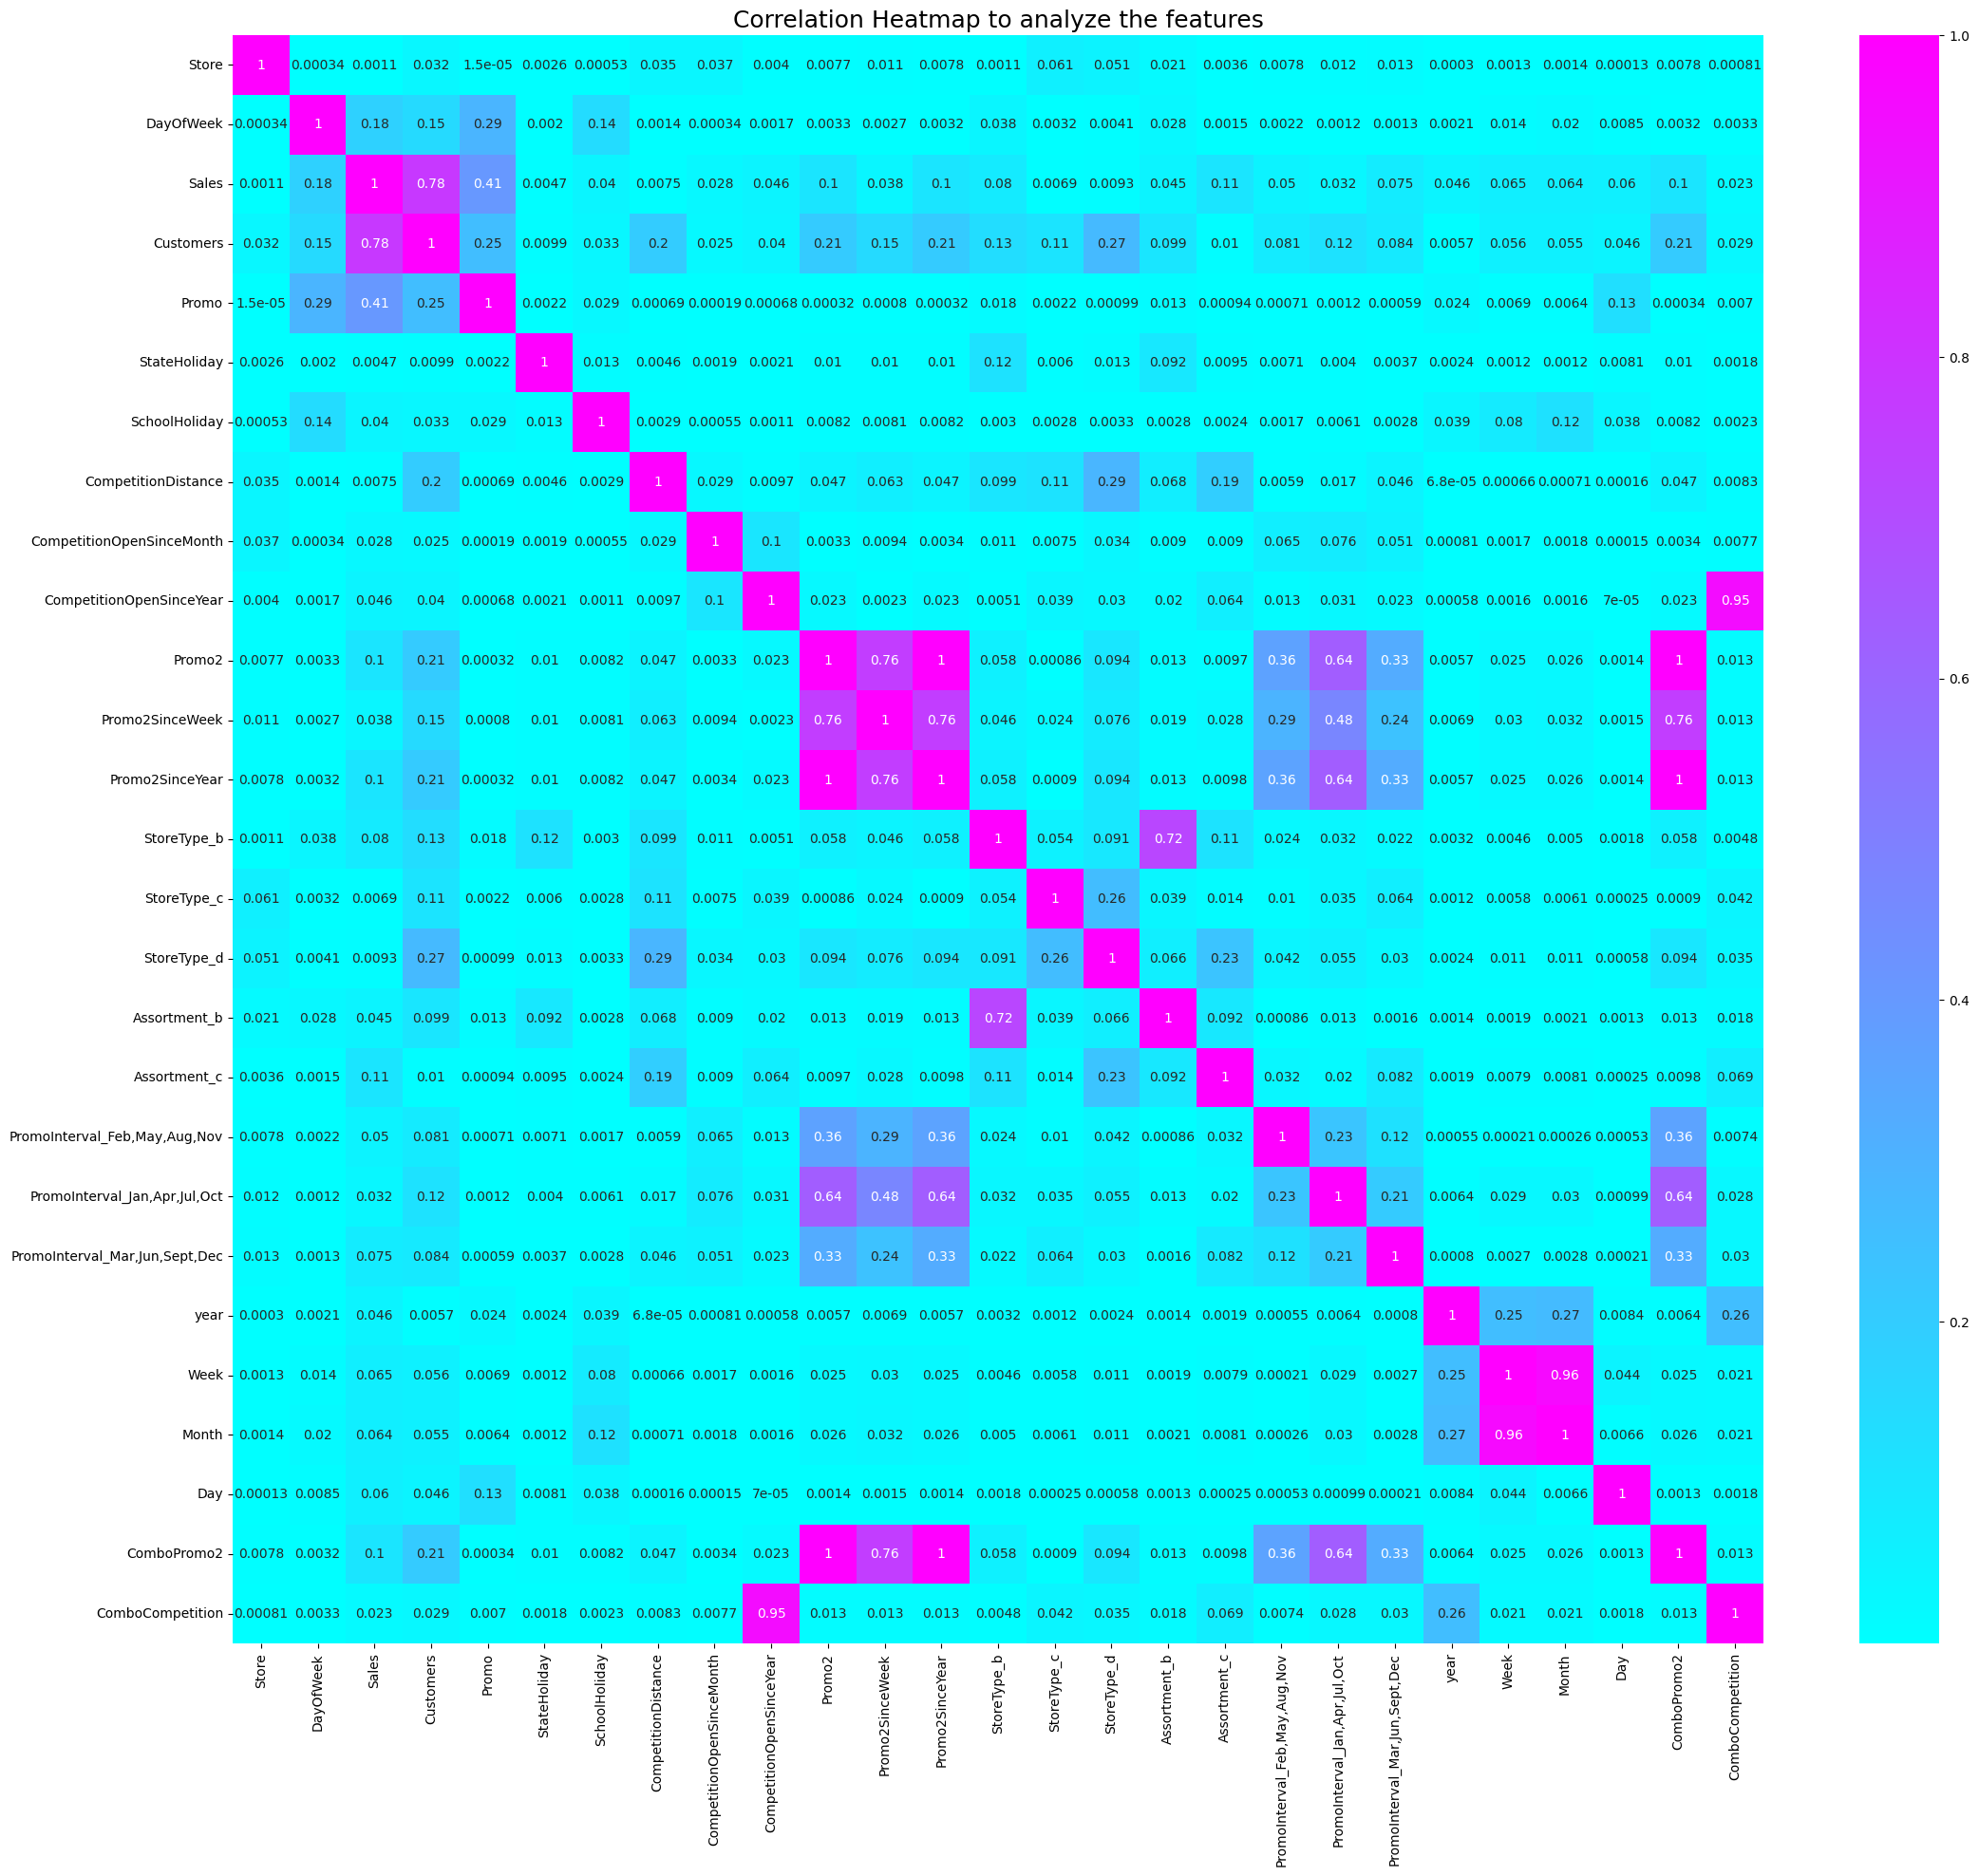

In [ ]:
# first we have to analyze the correlation between the current features
# plotting heatmap to analyze the correlation
plt.figure(figsize = (26,22))
sns.heatmap(abs(new_dataset.corr()), annot = True, cmap = 'cool').set_title('Correlation Heatmap to analyze the features', fontsize = 18)
plt.show

In [ ]:
# Select your features wisely to avoid overfitting

# firstly importing and calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# since sales is our target variable. so, firstly we have to exclude that
calc_vif(new_dataset[[i for i in new_dataset.describe().columns if i not in ['Sales']]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Store,4.053531e+00
1,DayOfWeek,5.811681e+00
2,Customers,1.148751e+01
3,Promo,2.141790e+00
4,StateHoliday,1.015505e+00
5,SchoolHoliday,1.307964e+00
6,CompetitionDistance,2.354824e+00
7,CompetitionOpenSinceMonth,1.653928e+01
8,CompetitionOpenSinceYear,5.265121e+07
9,Promo2,inf


Our variables are still showing high VIF value. So we need to remove them.

In [ ]:
# here we have to remove some unnecessary features
calc_vif(new_dataset[[i for i in new_dataset.describe().columns if i not in ['Sales','Store', 'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Month', 'year','Week']]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,DayOfWeek,5.809110
1,Customers,11.430159
2,Promo,2.127671
3,StateHoliday,1.015465
4,SchoolHoliday,1.267240
5,CompetitionDistance,2.333559
6,Promo2,inf
7,StoreType_b,2.196197
8,StoreType_c,1.268331
9,StoreType_d,1.848747


StoreType_b and Assortment_b are highly correlated with each other and Assortment_b is less correlated with sales so we will remove Assortment_b and also Promo2 and PromoInterval_Jan, Apr,Jul, Oct are highly correlated with each other so we need to remove one of them.



In [ ]:
calc_vif(new_dataset[[i for i in new_dataset.describe().columns if i not in['Sales','Store', 'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Month', 'year','Week','Assortment_b','PromoInterval_Jan,Apr,Jul,Oct']]])

,variables,VIF
0,DayOfWeek,5.809093
1,Customers,11.426733
2,Promo,2.127633
3,StateHoliday,1.015313
4,SchoolHoliday,1.267238
5,CompetitionDistance,2.333153
6,Promo2,14.960362
7,StoreType_b,1.080884
8,StoreType_c,1.268329
9,StoreType_d,1.848742


ComboPromo2 is still showing high VIF value. So we need to remove them.

In [ ]:
# since 'Customers','Promo2'and 'ComboPromo2' are showing high VIF value and ComboPromo2 has least correlation with sales
calc_vif(new_dataset[[i for i in new_dataset.describe().columns if i not in['Sales','Store', 'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Month', 'year','Week','Assortment_b','PromoInterval_Jan,Apr,Jul,Oct','ComboPromo2']]])

,variables,VIF
0,DayOfWeek,4.288603
1,Customers,6.529355
2,Promo,2.075912
3,StateHoliday,1.015179
4,SchoolHoliday,1.248453
5,CompetitionDistance,2.178981
6,Promo2,2.652455
7,StoreType_b,1.080654
8,StoreType_c,1.263482
9,StoreType_d,1.779109


In [ ]:
final_dataset = new_dataset[['DayOfWeek','Customers','Promo','StateHoliday','SchoolHoliday','CompetitionDistance','Promo2','StoreType_b','StoreType_c','StoreType_d','Assortment_c','PromoInterval_Feb,May,Aug,Nov','PromoInterval_Mar,Jun,Sept,Dec','Day','ComboCompetition','Sales']]

In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   DayOfWeek                       844338 non-null  int64
 1   Customers                       844338 non-null  int64
 2   Promo                           844338 non-null  int64
 3   StateHoliday                    844338 non-null  int64
 4   SchoolHoliday                   844338 non-null  int64
 5   CompetitionDistance             844338 non-null  int64
 6   Promo2                          844338 non-null  int64
 7   StoreType_b                     844338 non-null  int64
 8   StoreType_c                     844338 non-null  int64
 9   StoreType_d                     844338 non-null  int64
 10  Assortment_c                    844338 non-null  int64
 11  PromoInterval_Feb,May,Aug,Nov   844338 non-null  int64
 12  PromoInterval_Mar,Jun,Sept,Dec  844338 non-

In [ ]:
final_dataset.shape

(844338, 16)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

### 6. Data Scaling

In [ ]:
# separation of 'x' and 'y' variable
X = final_dataset[['DayOfWeek','Customers','Promo','StateHoliday','SchoolHoliday','CompetitionDistance','Promo2','StoreType_b','StoreType_c','StoreType_d','Assortment_c','PromoInterval_Feb,May,Aug,Nov','PromoInterval_Mar,Jun,Sept,Dec','Day','ComboCompetition']]
Y = final_dataset[['Sales']]
print(X.shape)
print(Y.shape)

(844338, 15)
(844338, 1)


In [ ]:
# Scaling your data
# impoortation  of Standard Scaler Library
from sklearn.preprocessing import StandardScaler

In [ ]:
# creation of object
std_rgrsr = StandardScaler()

In [ ]:
# fit and transformation
x = std_rgrsr.fit_transform(X)

##### Which method have you used to scale you data and why?

We have used standard scaler method to scale our data. Standardizing the  data is important because features on different scale can lead to poor performance or slow convergence. Scaling the datas leads to compare the different features with the target variable by comparing the magnitude of its coefficient.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
# not needed

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your datato train and test. Choose Splitting ratio wisely
# importation of  train-test split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# splitting the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)

In [ ]:
# shape after splitting
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((675470, 15), (168868, 15), (675470, 1), (168868, 1))

##### What data splitting ratio have you used and why?

We have splitted our dataset into 80% to train and 20% to test. We splitted the dataset into this ratio because our dataset is huge and contains nearly 10 lakh observations.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# not needed

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# Importation of required libraries to measure the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### ML Model - 1(Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 1 Implementaion
lnr_rgrs = LinearRegression()
# Fit the Algorithm
lnr_rgrs.fit(X_train,Y_train)
# Predict the model
y_train_regression_pred= lnr_rgrs.predict(X_train)
y_test_regression_pred= lnr_rgrs.predict(X_test)


In [ ]:
# score
lnr_rgrs.score(X_train, Y_train)

0.716427590541556

In [ ]:
# checking coefficients
lnr_rgrs.coef_

array([[-5.29786181e+00,  7.71726257e+00,  9.58592204e+02,
        -1.52837165e+02,  4.86377443e+01,  6.04001763e-02,
         3.18839276e+02,  1.61978999e+02, -1.45077809e+02,
         9.36054902e+02,  2.76390651e+02, -1.40655310e+02,
        -2.84183021e+02,  4.54568866e-01,  6.86677128e-01]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# first we have to define the function which will calculate the regression metrics
def regression_metrics(Y_train_actual,Y_train_pred,Y_test_actual,Y_test_pred):

  # Mean Absolute Error
  Train_MAE= mean_absolute_error(Y_train,Y_train_pred)
  print('MAE on train is:',Train_MAE)
  Test_MAE= mean_absolute_error(Y_test,Y_test_pred)
  print('MAE on test is:',Test_MAE)

  # Mean Squared Error
  Train_MSE= mean_squared_error(Y_train, Y_train_pred)
  print('MSE on train is:',Train_MSE)
  Test_MSE  = mean_squared_error(Y_test, Y_test_pred)
  print('MSE on test is:',Test_MSE)

  # Root Mean Squared Error
  Train_RMSE = np.sqrt(Train_MSE)
  print('RMSE on train is:',Train_RMSE)
  Test_RMSE = np.sqrt(Test_MSE)
  print('RMSE on test is:',Test_RMSE)

  # Mean Absolute Percentage Error
  Train_MAPE = mean_absolute_percentage_error(Y_train, Y_train_pred)*100
  print('MAPE on train is:',Train_MAPE, " %")
  Test_MAPE = mean_absolute_percentage_error(Y_test, Y_test_pred)*100
  print('MAPE on test is:',Test_MAPE, " %")

  # r2 Score
  R2_Train= r2_score(Y_train,Y_train_pred)
  print('R2 on train is:',R2_Train)
  R2_Test= r2_score(Y_test,Y_test_pred)
  print('R2 on test is:' ,R2_Test)

  Accuracy_train= 100- Train_MAPE
  print('Accuracy of train is:' ,Accuracy_train, " %")
  Accuracy_test= 100- Test_MAPE
  print('Accuracy of test is:' ,Accuracy_test, " %")


In [ ]:
# Calculating the regression metrics
regression_metrics(Y_train,y_train_regression_pred,Y_test,y_test_regression_pred)

MAE on train is: 924.2978800919573
MAE on test is: 921.6985853594916
MSE on train is: 1631356.9059420626
MSE on test is: 1622212.3234558338
RMSE on train is: 1277.2458283126482
RMSE on test is: 1273.6609923585766
MAPE on train is: 14.415764434053694  %
MAPE on test is: 14.338608553204196  %
R2 on train is: 0.716427590541556
R2 on test is: 0.719342962763482
Accuracy of train is: 85.5842355659463  %
Accuracy of test is: 85.6613914467958  %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creation of Ridge Instance
ridge= Ridge()

# Parameters
parameters = {'alpha': [17], 'max_iter':[1]}

# Train the model
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_reg.fit(X_train,Y_train)

# Predicting the output
Y_train_ridge_pred = ridge_reg.predict(X_train)
Y_test_ridge_pred = ridge_reg.predict(X_test)

# Printing parameters obtained by GridSearchCV
print(f'Required best alpha value would be: {ridge_reg.best_params_}')
print(f'Negative Mean Square Error is: {ridge_reg.best_score_}')

Required best alpha value would be: {'alpha': 17, 'max_iter': 1}
Negative Mean Square Error is: -1631510.297096125


In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(Y_train,Y_train_ridge_pred,Y_test,Y_test_ridge_pred)

MAE on train is: 924.3002138248127
MAE on test is: 921.7001430420628
MSE on train is: 1631356.928739857
MSE on test is: 1622210.503840979
RMSE on train is: 1277.2458372372396
RMSE on test is: 1273.660278033738
MAPE on train is: 14.415829769735588  %
MAPE on test is: 14.338654554884053  %
R2 on train is: 0.7164275865787043
R2 on test is: 0.7193432775728978
Accuracy of train is: 85.58417023026442  %
Accuracy of test is: 85.66134544511594  %


In [ ]:
# Importation of Lasso from sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creation of ridge instance
lasso = Lasso()

# Defining Parameters
parameters = {'alpha': [0.01], 'max_iter': [10]}

# Train the model
lasso_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(X_train,Y_train)

# Prediction of output
Y_train_lasso_pred = lasso_reg.predict(X_train)
Y_test_lasso_pred = lasso_reg.predict(X_test)

# Printing parameters for GridSearchCV
print(f'Required best alpha value would be: {lasso_reg.best_params_}')
print(f'Negative Mean Square Error is: {lasso_reg.best_score_}')

Required best alpha value would be: {'alpha': 0.01, 'max_iter': 10}
Negative Mean Square Error is: -1631495.4807638328


In [ ]:
# Calculating regression metrics for Lasso
regression_metrics(Y_train,Y_train_lasso_pred,Y_test,Y_test_lasso_pred)

MAE on train is: 924.2978814539813
MAE on test is: 921.6985862704445
MSE on train is: 1631356.9059420703
MSE on test is: 1622212.3223420945
RMSE on train is: 1277.2458283126512
RMSE on test is: 1273.6609919213568
MAPE on train is: 14.415764472599932  %
MAPE on test is: 14.338608580325749  %
R2 on train is: 0.7164275905415547
R2 on test is: 0.7193429629561687
Accuracy of train is: 85.58423552740007  %
Accuracy of test is: 85.66139141967425  %


In [ ]:
# Importation of elastic net from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Creation of e_net instance
e_net= ElasticNet()

# Defining Hyperparameters
params_e_net = {'alpha': [0.001], 'max_iter':[10]}

# Train the model
e_net_reg = GridSearchCV(e_net, params_e_net, scoring='neg_mean_squared_error', cv=5)
e_net_reg.fit(X_train,Y_train)

# Predict the output
Y_train_e_net_pred = e_net_reg.predict(X_train)
Y_test_e_net_pred = e_net_reg.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f'Required best alpha value would be: {e_net_reg.best_params_}')
print(f'Negative Mean Squared Error is: {e_net_reg.best_score_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.407e+11, tolerance: 3.107e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.410e+11, tolerance: 3.111e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+11, tolerance: 3.109e

Required best alpha value would be: {'alpha': 0.001, 'max_iter': 10}
Negative Mean Squared Error is: -1631486.7503471272


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.507e+11, tolerance: 3.886e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Calculating regression metrics for Elastic Net
regression_metrics(Y_train,Y_train_e_net_pred,Y_test,Y_test_e_net_pred)

MAE on train is: 924.3443915067901
MAE on test is: 921.732976398237
MSE on train is: 1631363.029255994
MSE on test is: 1622194.694250653
RMSE on train is: 1277.2482253876863
RMSE on test is: 1273.6540716578631
MAPE on train is: 14.416960041054782  %
MAPE on test is: 14.339539018407956  %
R2 on train is: 0.7164265261497733
R2 on test is: 0.7193460127714393
Accuracy of train is: 85.58303995894522  %
Accuracy of test is: 85.66046098159204  %


##### Which hyperparameter optimization technique have you used and why?

Here we have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Haven't seen any improvement while  using ridge, lasso and ealstic net models. This means  that we  need to go through more complex ML models.

### ML Model - 2(Decision Tree)

In [ ]:
# Importation of Regressor
from sklearn.tree import DecisionTreeRegressor

# creation of regressor object
tree_reg = DecisionTreeRegressor(max_depth=16)

# Fitting the  regressor with X and Y data
tree_reg.fit(X_train, Y_train)

# Predicting the model
Y_train_tree_pred= tree_reg.predict(X_train)
Y_test_tree_pred= tree_reg.predict(X_test)

In [ ]:
# Calculating Regression Metrics
regression_metrics(Y_train,Y_train_tree_pred,Y_test,Y_test_tree_pred)

MAE on train is: 468.6499929090131
MAE on test is: 548.5117312143011
MSE on train is: 509401.09327869216
MSE on test is: 670518.0419805396
RMSE on train is: 713.723401100659
RMSE on test is: 818.8516605469757
MAPE on train is: 6.9786268734814225  %
MAPE on test is: 8.162553657050058  %
R2 on train is: 0.9114527943728001
R2 on test is: 0.8839944658569764
Accuracy of train is: 93.02137312651858  %
Accuracy of test is: 91.83744634294995  %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# importation of required library for decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creation of ridge instance
decision_tree= DecisionTreeRegressor()

# defining Parameters
parameter = {'max_depth': [22], 'min_samples_leaf': [6], 'min_samples_split': [4]}

# Train the model
dcsn_tree_reg = GridSearchCV(decision_tree, parameter, scoring='neg_mean_squared_error', cv=3)
dcsn_tree_reg.fit(X_train, Y_train)

# Predict the output
Y_train_grid_Dtree_pred = dcsn_tree_reg.predict(X_train)
Y_test_grid_Dtree_pred = dcsn_tree_reg.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f'Required best alpha value would be: {dcsn_tree_reg.best_params_}')
print(f'Negative Mean Square Errpr is: {dcsn_tree_reg.best_score_}')

Required best alpha value would be: {'max_depth': 22, 'min_samples_leaf': 6, 'min_samples_split': 4}
Negative Mean Square Errpr is: -601049.472545697


In [ ]:
# Calculating Regression Metrics
regression_metrics(Y_train,Y_train_grid_Dtree_pred,Y_test,Y_test_grid_Dtree_pred)

MAE on train is: 341.8124747818646
MAE on test is: 469.04096395395896
MSE on train is: 302303.44896641007
MSE on test is: 544358.0884621703
RMSE on train is: 549.8212882077322
RMSE on test is: 737.8062675676931
MAPE on train is: 5.051796663508481  %
MAPE on test is: 6.957109784213874  %
R2 on train is: 0.9474517703031398
R2 on test is: 0.9058212503415946
Accuracy of train is: 94.94820333649152  %
Accuracy of test is: 93.04289021578613  %


##### Which hyperparameter optimization technique have you used and why?

Here we have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is improvement in accuracy. Accuracy increases from 91.83 to 93.04 and r2 is increased from 0.88 to 0.90.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing very slight difference on the train and test data which shows that our model is predicting a quite closer expected value. So the sales, the dependent variable, which impacts the business is getting accurately predicted to the extent of ~93% and ~7% far from the mean of actual absolute values.

### ML Model - 3(Random Forest Regression)

In [ ]:
# # import the regressor
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18)

# fit the regressor with X and Y data
RF_TreeR.fit(X_train, Y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(X_train)
y_test_RFtree_pred= RF_TreeR.predict(X_test)

<ipython-input-134-833d000d7d9a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_TreeR.fit(X_train, Y_train)


In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(Y_train,y_train_RFtree_pred,Y_test,y_test_RFtree_pred)

MAE on train is: 340.4176791809814
MAE on test is: 436.2679724383484
MSE on train is: 278119.30593971134
MSE on test is: 444195.50254910166
RMSE on train is: 527.3701792287002
RMSE on test is: 666.4799340933691
MAPE on train is: 5.0103856316195055  %
MAPE on test is: 6.444111797294314  %
R2 on train is: 0.9516556055790314
R2 on test is: 0.9231502609759263
Accuracy of train is: 94.9896143683805  %
Accuracy of test is: 93.55588820270569  %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [22], 'min_samples_leaf': [2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=3, n_jobs=-1, scoring='neg_mean_squared_error', cv=5,  verbose=3)
RF_treeR.fit(X_train,Y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(X_train)
y_test_grid_RFtree_pred = RF_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 22}
Negative mean square error is: -413413.966067634


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(Y_train,y_train_grid_RFtree_pred,Y_test,y_test_grid_RFtree_pred)

MAE on train is: 247.15837132383427
MAE on test is: 399.59217615610993
MSE on train is: 166180.1543626136
MSE on test is: 396605.1467340538
RMSE on train is: 407.6520015437353
RMSE on test is: 629.7659459942669
MAPE on train is: 3.619760192980708  %
MAPE on test is: 5.911366393798598  %
R2 on train is: 0.9711135517892269
R2 on test is: 0.931383812201594
Accuracy of train is: 96.3802398070193  %
Accuracy of test is: 94.0886336062014  %


##### Which hyperparameter optimization technique have you used and why?

Here we have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is improvement in accuracy. Accuracy increases from 93.55 to 94.08 and r2 is increased from 0.92 to 0.93



### 1. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# creating variable to store all the regression metrics used here to compare their accuracy
reg_metrics = ['Linear_regression', 'Decision_tree','Random_forest']
MAE_reg = [921.73,469.05,399.58]
MSE_reg = [1622194.69,544176.19,396910.24]
RMSE_reg = [1273.65,737.68,630.008]
MAPE_reg = [14.33,6.95,5.91]
r2_reg = [0.71,0.90,0.93]
accuracy_reg = [85.66,93.04,94.08]

# creatig dataframe from the list
data ={'Model':reg_metrics,
       'MAE':MAE_reg,
       'MSE':MSE_reg,
       'RMSE':RMSE_reg,
       'MAPE':MAPE_reg,
       'R2':r2_reg ,
       'Accuracy':accuracy_reg}

metrics_DF =pd.DataFrame(data)

# print DataFrame
metrics_DF

,Model,MAE,MSE,RMSE,MAPE,R2,Accuracy
0,Linear_regression,921.73,1622194.69,1273.650,14.33,0.71,85.66
1,Decision_tree,469.05,544176.19,737.680,6.95,0.90,93.04
2,Random_forest,399.58,396910.24,630.008,5.91,0.93,94.08


We will choose Random_Forest for our final prediction model bcz. it is giving us the most accurate result(94.08) than the rest two.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  Random forest regression generally achieves extremely high accuracies. It usually produces better results than other linear models, including linear regression and logistic regression.

**Feature Importance**

Text(0.5, 0, 'Relative Importance')

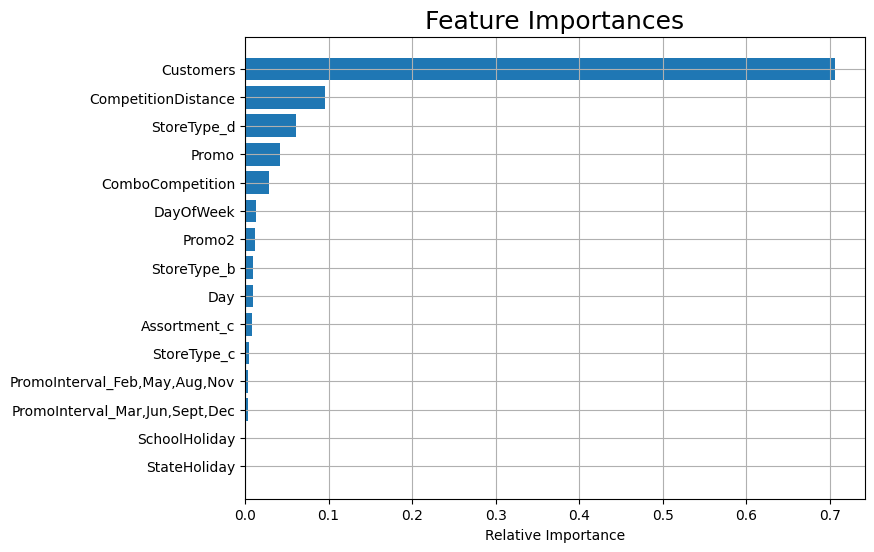

In [ ]:
features = final_dataset.columns
importances = RF_TreeR.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (8,6))
plt.grid(zorder = 0)
plt.title('Feature Importances', fontsize = 18)
plt.barh(range(len(indices)),  importances[indices],align = 'center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# importing pickle module
import pickle
new_file = 'Rossmann_regression.pkl'
pickle.dump(RF_treeR, open(new_file,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# unserialize process
reg_model = pickle.load(open(new_file, 'rb'))

# prediction of unseen data
reg_model.predict(X_test)

array([ 8472.63096257,  5286.20976509,  8552.50001503, ...,
        9668.87432282, 10181.81915873,  8582.68585169])

In [ ]:
# checking whether we are getting same predicted values or not
y_test_grid_RFtree_pred

array([ 8472.63096257,  5286.20976509,  8552.50001503, ...,
        9668.87432282, 10181.81915873,  8582.68585169])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Conclusions drawn from EDA**



*   store of type 'a' is maximum and store type 'b' is least. It may indicates that store type 'a' is more successful whereas 'b' is least. Store type 'd' is average and store type 'c' is not least but below than average.


*   We observed that average number of customer visiting stores is approx 700 And average value of sales is around 5000 and also the graph is rightly skewed which means most of the stores are open where the middle class resides



*   Store type 'a' and store type 'c' are showing positive growth which leads to more sales while store type 'b'' is showing less growth which leads to less sales that's might be the reason to adopt 'a' and 'c' type assortment strategy.


*   From the graph we can conclude that stores getting promoted and not getting promoted are almost equal.




*   Correlation between customers and sales is preety good as customers are increasing sales are also healing upside.

* During the StateHoliday 'b' sales are highest and followed by StateHoliday 'c' followed by StateHoliday 'a'. And also we are observing that sales are comparitively low during normal days than the holidays time.


*   Sales are little high during SchoolHoliday as compared to during Non-SchoolHoliday


*   Assortment_b has highest sales, assortment_a has lowest sales and assortment_c has average sales.



*   1. Sales are highest on 7th and 1st day of week respectively and least on 6th day of  week.
    2. Sales  are highest during last two month of  the  year i.e., November and December and least sales are during the month of September.
    3. Sales are increasing every year but with a very  low speed.

*   Sales are high for those store which are doing promotion.

*   Sales are not that much satisfactory for the stores which are running consecutive promotions i.e., customers are not paying attention to these stores.

* From year 1900 to 2000 sales was in good state but from 2000 there is downfall in sales. It might be due to less competitor during 1900 but gradually competitor increases and sales got affected.  


*   Sales are pretty good for densely located stores.



**Conclusion Drawn from ML Model Implementation**

Conclusions drawn on the basis of various regression model in which first is Linear Regression second is Decision Tree and last one is Random Forest. We will go through all these model one by one


In Linear Regression we have approx 85% accuracy on test data but this is not upto the mark. So for more accuracy we moved further with more complex model i.e., Decision Tree.

In this model we got approx 93% accuracy on test data which is actually good over Linear Regression Model. but for satisfaction we gone through one more model which is Random Forest Regressor.

In this model we got approx 94% accuracy on test data which is one more good step over the previous model.

Since Random Forest Regressor is giving the best result. So we will use Random Forest Regressor to predict our model.















### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***